In [381]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [382]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated SAR data

In [383]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/"

In [384]:
with open(data_dir + 'collocated_dict_5e_5_filtered_sar_era5.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [385]:
df = pd.concat(d.values(), ignore_index=True)
df

CE        CN          IR           Lv          P10         Pair  \
0    0.131507  0.306354  344.480002  2476.816541  1005.776480  1006.983499   
1    0.169644  0.076862  301.660002  2477.280367  1011.450370  1012.675998   
2    0.025622 -0.383063  274.325002  2476.904365  1020.987403  1022.212997   
3   -0.202953 -0.490062  309.255003  2476.669098  1013.606853  1014.807996   
4   -0.026441 -0.730744  320.615001  2475.218603  1018.266915  1019.488495   
..        ...       ...         ...          ...          ...          ...   
405  0.078067 -0.018678  257.755003  2492.003937   994.435538   995.682013   
406  0.078067 -0.018678  257.135000  2491.579194   994.525701   995.769507   
407  0.078067 -0.018678  238.530001  2491.798855   999.285638  1000.545505   
408  0.078067 -0.018678  266.660001  2491.502372  1002.762277  1004.015002   
409  0.078067 -0.018678  267.574999  2491.964731   999.145041  1000.397998   

          Q10      Qair         RH       RH10  ...  valid_flag    s0_norm  \
0    5.750744  5.858569  73.541799  72.235029  ...        True  -7.755438   
1    5.016032  5.128066  77.170098  76.182660  ...        True  -7.311450   
2    4.964464  5.199127  66.090098  63.038793  ...        True -10.255534   
3    4.241058  4.533348  44.618498  40.755557  ...        True  -8.636513   
4    7.084940  7.120605  91.120398  91.004979  ...        True -14.836988   
..        ...       ...        ...        ...  ...         ...        ...   
405  2.661181  2.718112  73.889103  72.947993  ...        True  -9.140169   
406  2.913308  2.980954  77.774753  76.929502  ...        True  -9.058357   
407  2.513606  2.630492  80.575903  79.902359  ...        True  -6.148265   
408  2.848601  2.917305  75.022252  74.087723  ...        True -11.094656   
409  2.850011  2.943405  81.332702  79.900122  ...        True  -7.744822   

            s0        inc          az     s0_max     s0_min  s0_std  \
0    -8.815776  32.142911  280.917511  -8.815776  -8.815776     0.0   
1   -15.691008  42.147045  279.718475 -15.691008 -15.691008     0.0   
2   -13.824358  32.153725  280.917114 -13.824358 -13.824358     0.0   
3   -18.343288  42.149823  279.718201 -18.343288 -18.343288     0.0   
4   -22.981560  32.146370  280.917114 -22.981560 -22.981560     0.0   
..         ...        ...         ...        ...        ...     ...   
405 -12.834813  33.753190  281.969360 -12.834813 -12.834813     0.0   
406 -17.941219  40.544464  439.776978 -17.941219 -17.941219     0.0   
407 -12.268633  40.734668  280.223236 -12.268633 -12.268633     0.0   
408 -16.578063  33.539628  438.030487 -16.578063 -16.578063     0.0   
409 -10.038090  33.745420  281.969055 -10.038090 -10.038090     0.0   

           u10        v10  
0    -1.079882  11.277792  
1    10.322560   3.875976  
2    -4.728710  -3.410125  
3    -9.923150  -0.006022  
4    -1.088014  -4.630033  
..         ...        ...  
405   4.967300   2.593653  
406   5.609658   7.776169  
407   8.168199   3.338481  
408   4.111084   9.533497  
409  13.912084   7.032796  

[410 rows x 63 columns]

In [386]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

CE        CN          IR           Lv          P10         Pair  \
0    0.131507  0.306354  344.480002  2476.816541  1005.776480  1006.983499   
1    0.169644  0.076862  301.660002  2477.280367  1011.450370  1012.675998   
2    0.025622 -0.383063  274.325002  2476.904365  1020.987403  1022.212997   
3   -0.202953 -0.490062  309.255003  2476.669098  1013.606853  1014.807996   
4   -0.026441 -0.730744  320.615001  2475.218603  1018.266915  1019.488495   
..        ...       ...         ...          ...          ...          ...   
405  0.078067 -0.018678  257.755003  2492.003937   994.435538   995.682013   
406  0.078067 -0.018678  257.135000  2491.579194   994.525701   995.769507   
407  0.078067 -0.018678  238.530001  2491.798855   999.285638  1000.545505   
408  0.078067 -0.018678  266.660001  2491.502372  1002.762277  1004.015002   
409  0.078067 -0.018678  267.574999  2491.964731   999.145041  1000.397998   

          Q10      Qair         RH       RH10  ...  valid_flag    s0_norm  \
0    5.750744  5.858569  73.541799  72.235029  ...        True  -7.755438   
1    5.016032  5.128066  77.170098  76.182660  ...        True  -7.311450   
2    4.964464  5.199127  66.090098  63.038793  ...        True -10.255534   
3    4.241058  4.533348  44.618498  40.755557  ...        True  -8.636513   
4    7.084940  7.120605  91.120398  91.004979  ...        True -14.836988   
..        ...       ...        ...        ...  ...         ...        ...   
405  2.661181  2.718112  73.889103  72.947993  ...        True  -9.140169   
406  2.913308  2.980954  77.774753  76.929502  ...        True  -9.058357   
407  2.513606  2.630492  80.575903  79.902359  ...        True  -6.148265   
408  2.848601  2.917305  75.022252  74.087723  ...        True -11.094656   
409  2.850011  2.943405  81.332702  79.900122  ...        True  -7.744822   

            s0        inc          az     s0_max     s0_min  s0_std  \
0    -8.815776  32.142911  280.917511  -8.815776  -8.815776     0.0   
1   -15.691008  42.147045  279.718475 -15.691008 -15.691008     0.0   
2   -13.824358  32.153725  280.917114 -13.824358 -13.824358     0.0   
3   -18.343288  42.149823  279.718201 -18.343288 -18.343288     0.0   
4   -22.981560  32.146370  280.917114 -22.981560 -22.981560     0.0   
..         ...        ...         ...        ...        ...     ...   
405 -12.834813  33.753190  281.969360 -12.834813 -12.834813     0.0   
406 -17.941219  40.544464  439.776978 -17.941219 -17.941219     0.0   
407 -12.268633  40.734668  280.223236 -12.268633 -12.268633     0.0   
408 -16.578063  33.539628  438.030487 -16.578063 -16.578063     0.0   
409 -10.038090  33.745420  281.969055 -10.038090 -10.038090     0.0   

           u10        v10  
0    -1.079882  11.277792  
1    10.322560   3.875976  
2    -4.728710  -3.410125  
3    -9.923150  -0.006022  
4    -1.088014  -4.630033  
..         ...        ...  
405   4.967300   2.593653  
406   5.609658   7.776169  
407   8.168199   3.338481  
408   4.111084   9.533497  
409  13.912084   7.032796  

[410 rows x 63 columns]

In [387]:
df = df.sample(frac = 1, random_state=77)
df     

CE        CN          IR           Lv          P10         Pair  \
300 -0.012150 -0.032903  327.125002  2491.398764  1034.871906  1036.155530   
381  0.078067 -0.018678  316.379997  2486.020202  1001.087127  1002.327002   
108 -0.048482 -0.054835  333.104999  2477.888062  1011.927463  1013.146500   
94   0.098618 -0.014385  353.225000  2481.278990  1014.799327  1016.010495   
289 -0.012150 -0.032903  293.824998  2491.803394  1008.456695  1009.699500   
..        ...       ...         ...          ...          ...          ...   
293 -0.012150 -0.032903  339.339998  2490.820422   993.575404   994.797507   
235 -0.012150 -0.032903  263.644999  2487.925266   991.189028   992.409497   
84  -0.315976  0.132105  333.880003  2471.162107  1000.264070  1001.478503   
95  -0.009993  0.031252  282.370000  2485.421032  1020.108655  1021.350995   
215 -0.011104 -0.115881  346.885004  2476.713532  1011.273739  1012.491513   

          Q10      Qair         RH       RH10  ...  valid_flag    s0_norm  \
300  4.100282  4.110465  95.989404  96.187439  ...        True -14.918911   
381  4.116639  4.159194  91.359453  91.275100  ...        True  -8.355029   
108  6.965927  6.980134  93.698100  93.687086  ...        True  -9.694715   
94   7.905501  7.798062  91.634647  91.269765  ...        True  -6.935540   
289  4.259576  4.288183  86.213853  85.824327  ...        True -11.330360   
..        ...       ...        ...        ...  ...         ...        ...   
293  4.975317  4.980046  95.771354  95.886296  ...        True  -9.551195   
235  4.218824  4.268435  82.945053  82.477130  ...        True  -8.971364   
84   5.270402  5.393428  84.232098  83.587054  ...        True  -7.685976   
95   5.237911  5.273152  88.951097  88.615952  ...        True  -9.699736   
215  5.423657  5.477614  71.757653  71.205217  ...        True -10.245456   

            s0        inc          az     s0_max     s0_min  s0_std       u10  \
300 -29.809161  40.733684  280.224518 -29.809161 -29.809161     0.0  6.045154   
381 -16.680374  40.732366  280.222870 -16.680374 -16.680374     0.0  8.021218   
108 -19.353100  40.723802  280.224518 -19.353100 -19.353100     0.0 -5.669697   
94  -15.135897  42.400538  440.389984 -15.135897 -15.135897     0.0  6.495847   
289 -17.218870  33.757924  282.000641 -17.218870 -17.218870     0.0  6.045154   
..         ...        ...         ...        ...        ...     ...       ...   
293 -13.658052  33.754719  282.000427 -13.658052 -13.658052     0.0  6.045154   
235 -17.913435  40.732870  280.222595 -17.913435 -17.913435     0.0  2.151350   
84  -16.634214  42.397246  440.389404 -16.634214 -16.634214     0.0  3.966743   
95  -12.334466  31.666229  439.104034 -12.334466 -12.334466     0.0  7.627155   
215 -20.461043  40.732127  280.224121 -20.461043 -20.461043     0.0 -0.009023   

           v10  
300   7.037160  
381  -1.367607  
108  -2.507397  
94   11.473030  
289   7.037160  
..         ...  
293   7.037160  
235  -7.729190  
84   -7.637461  
95    2.237181  
215   1.070539  

[410 rows x 63 columns]

In [388]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

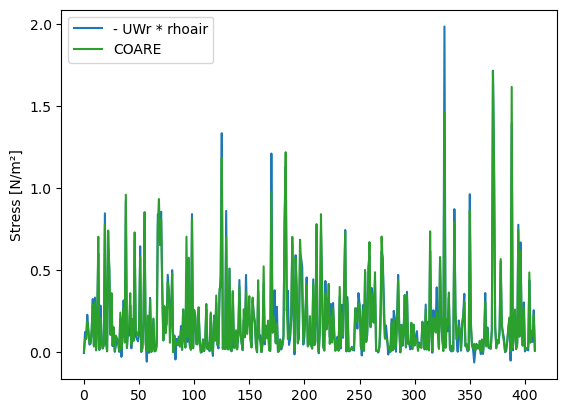

In [389]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [390]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [391]:
400*0.8

320.0

In [392]:
split_idx = 320

# S0, inc, az

# Prepare features and labels

In [393]:
predictor_variables = ['s0', 'inc', 'az', 'u10', 'v10']

In [394]:
x = df[predictor_variables]
x

s0        inc          az       u10        v10
300 -29.809161  40.733684  280.224518  6.045154   7.037160
381 -16.680374  40.732366  280.222870  8.021218  -1.367607
108 -19.353100  40.723802  280.224518 -5.669697  -2.507397
94  -15.135897  42.400538  440.389984  6.495847  11.473030
289 -17.218870  33.757924  282.000641  6.045154   7.037160
..         ...        ...         ...       ...        ...
293 -13.658052  33.754719  282.000427  6.045154   7.037160
235 -17.913435  40.732870  280.222595  2.151350  -7.729190
84  -16.634214  42.397246  440.389404  3.966743  -7.637461
95  -12.334466  31.666229  439.104034  7.627155   2.237181
215 -20.461043  40.732127  280.224121 -0.009023   1.070539

[410 rows x 5 columns]

In [395]:
y = - df['UWr'] * df['rhoair']
y

300   -0.003707
381    0.124103
108    0.083250
94     0.229089
289    0.130489
         ...   
293    0.079242
235    0.116743
84     0.063755
95     0.256668
215    0.016093
Length: 410, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [396]:
c = df['stress']

In [397]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [398]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [399]:
c_train = c[:split_idx]
c_test = c[split_idx:]

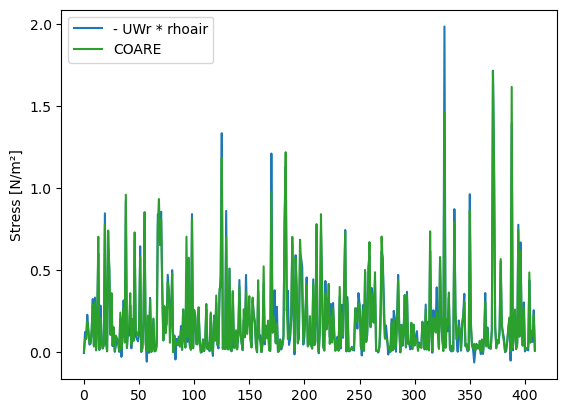

In [20]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

# ML setup

In [21]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [22]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [23]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-05-26 14:13:10.370931: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-05-26 14:13:10.371809: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-26 14:13:10.371819: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-26 14:13:10.371842: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ppi-r8login-b2.int.met.no): /proc/driver/nvidia/version does not exist
2023-05-26 14:13:10.372312: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations,

Epoch 1/500
7/7 [==============================] - 1s 112ms/step - loss: 103123.8691 - mean_absolute_error: 314.3283 - val_loss: 111277.6328 - val_mean_absolute_error: 325.6820
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 103446.1025 - mean_absolute_error: 314.6749 - val_loss: 109422.1250 - val_mean_absolute_error: 322.9370
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 99048.0244 - mean_absolute_error: 308.1167 - val_loss: 107589.9375 - val_mean_absolute_error: 320.2033
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 102421.3916 - mean_absolute_error: 312.7910 - val_loss: 105770.3516 - val_mean_absolute_error: 317.4653
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 97880.6914 - mean_absolute_error: 305.9575 - val_loss: 103983.3047 - val_mean_absolute_error: 314.7532
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 93996.6016 - mean_absolute_error: 300.0942 - val_loss:

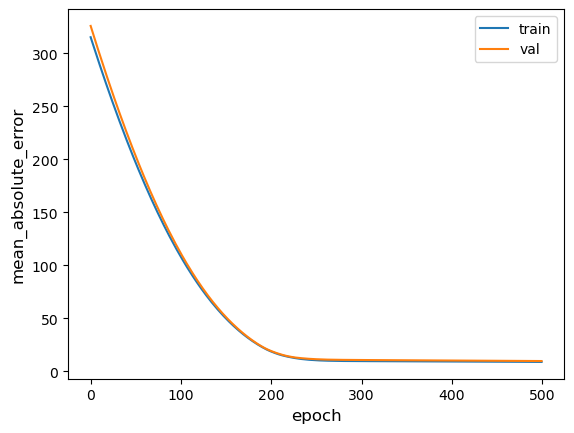

3/3 [==============================] - 0s 1ms/step - loss: 117.8248 - mean_absolute_error: 8.9977
Test accuracy 8.997745513916016
Test loss 117.82478332519531


In [24]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [25]:
y_test_pred = multi_dense_model.predict(x_test)

In [26]:
np.mean(y_test)

0.20288953337977453

In [27]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [28]:
rmse(y_test.values, y_test_pred)

10.710350621537541

In [29]:
rmse(y_test.values, c_test)

0.06884559918794826

# Other experiments

In [30]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [31]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [32]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 17ms/step - loss: 0.1279 - mean_absolute_error: 0.2438 - val_loss: 7.8298 - val_mean_absolute_error: 2.7135
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 0.1098 - mean_absolute_error: 0.2242 - val_loss: 3.0643 - val_mean_absolute_error: 1.6855
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 0.1062 - mean_absolute_error: 0.2254 - val_loss: 1.5484 - val_mean_absolute_error: 1.1862
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 0.0800 - mean_absolute_error: 0.2011 - val_loss: 0.8646 - val_mean_absolute_error: 0.8737
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 0.0823 - mean_absolute_error: 0.2038 - val_loss: 0.5075 - val_mean_absolute_error: 0.6554
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 0.0776 - mean_absolute_error: 0.1974 - val_loss: 0.3031 - val_mean_absolute_error: 0.4901
Epoch 7/500
7/7 [================

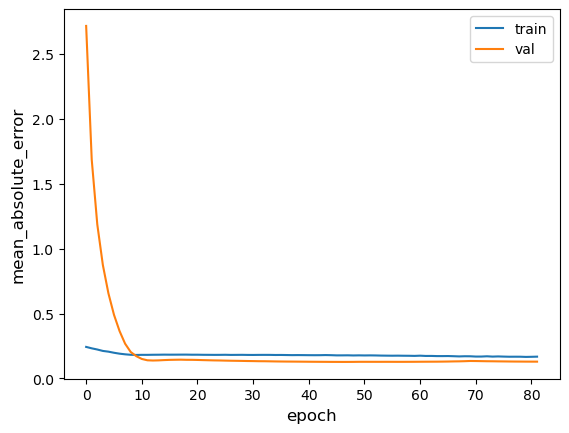

3/3 [==============================] - 0s 1ms/step - loss: 0.1343 - mean_absolute_error: 0.1724
Test accuracy 0.17244960367679596
Test loss 0.13429315388202667


In [33]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [34]:
y_test_pred = multi_dense_model.predict(x_test)

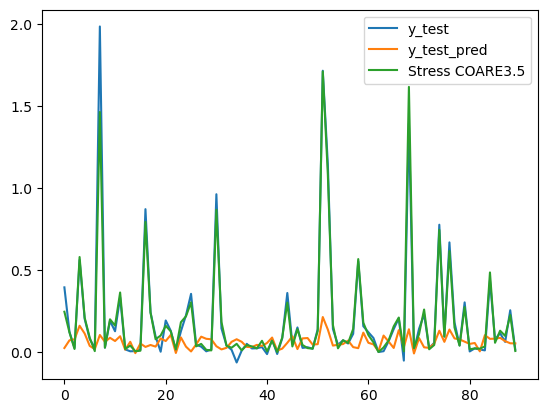

In [35]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [36]:
rmse(y_test.values, y_test_pred)

0.38452190646029644

## Correlation

In [37]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.48351314],
       [0.48351314, 1.        ]])

In [38]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [39]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [40]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [41]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 16ms/step - loss: 2.2633 - mean_absolute_error: 1.2646 - val_loss: 479.1006 - val_mean_absolute_error: 21.2036
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 1.8298 - mean_absolute_error: 1.1183 - val_loss: 212.4163 - val_mean_absolute_error: 14.0621
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 1.8883 - mean_absolute_error: 1.0446 - val_loss: 121.3096 - val_mean_absolute_error: 10.5865
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 1.7962 - mean_absolute_error: 1.0588 - val_loss: 78.6180 - val_mean_absolute_error: 8.4909
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 1.8871 - mean_absolute_error: 1.1456 - val_loss: 54.8846 - val_mean_absolute_error: 7.0626
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5148 - mean_absolute_error: 1.0316 - val_loss: 40.3097 - val_mean_absolute_error: 6.0226
Epoch 7/500
7/7 [====

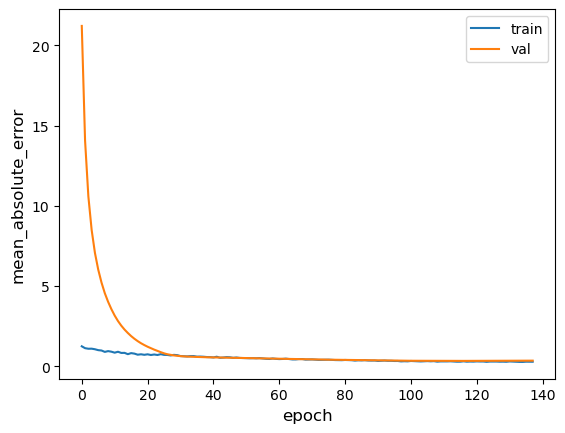

3/3 [==============================] - 0s 1ms/step - loss: 11.1615 - mean_absolute_error: 0.6481
Test accuracy 0.6480867266654968
Test loss 11.161507606506348


In [42]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [43]:
y_test_pred = multi_dense_model.predict(x_test)

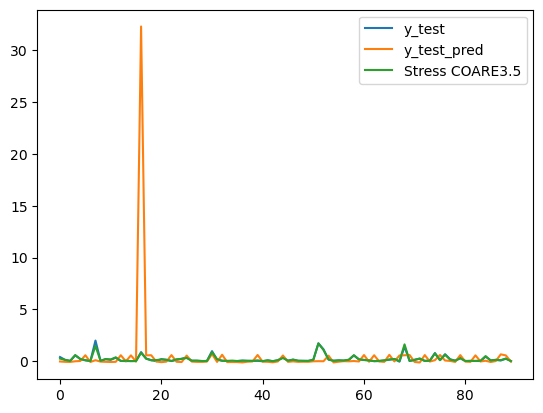

In [44]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [45]:
rmse(y_test.values, y_test_pred)

3.4141481124704267

## Correlation

In [46]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.20528128],
       [0.20528128, 1.        ]])

In [47]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [48]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [49]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [50]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 16ms/step - loss: 1.1674 - mean_absolute_error: 0.9488 - val_loss: 220.5566 - val_mean_absolute_error: 14.2730
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 1.1465 - mean_absolute_error: 0.9330 - val_loss: 96.4475 - val_mean_absolute_error: 9.3857
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 1.1389 - mean_absolute_error: 0.9354 - val_loss: 56.0183 - val_mean_absolute_error: 7.1073
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 0.9807 - mean_absolute_error: 0.8206 - val_loss: 36.7314 - val_mean_absolute_error: 5.7132
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 0.9728 - mean_absolute_error: 0.8388 - val_loss: 25.9599 - val_mean_absolute_error: 4.7638
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 0.9341 - mean_absolute_error: 0.8098 - val_loss: 19.0022 - val_mean_absolute_error: 4.0376
Epoch 7/500
7/7 [========

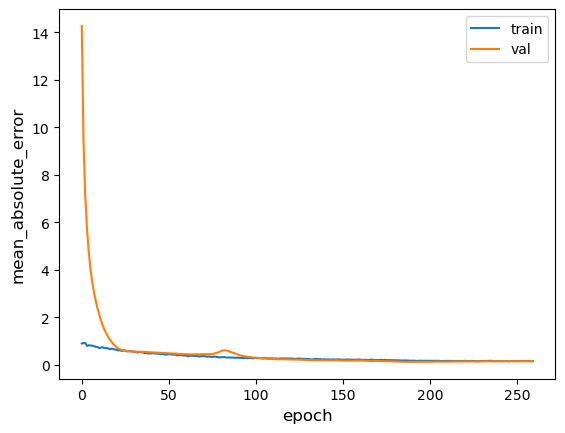

3/3 [==============================] - 0s 1ms/step - loss: 0.0851 - mean_absolute_error: 0.1693
Test accuracy 0.16930530965328217
Test loss 0.0850633755326271


In [51]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [52]:
y_test_pred = multi_dense_model.predict(x_test)

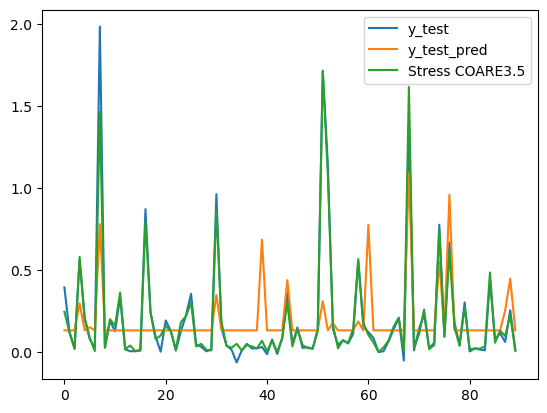

In [53]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [54]:
rmse(y_test.values, y_test_pred)

0.3991502768783973

## Correlation

In [55]:
y_test_pred.shape

(90, 1)

In [56]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.57930575],
       [0.57930575, 1.        ]])

In [57]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [58]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

### Best model!!!

In [59]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [60]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [61]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 19ms/step - loss: 1.8139 - mean_absolute_error: 1.0397 - val_loss: 17.6340 - val_mean_absolute_error: 4.1043
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 1.6150 - mean_absolute_error: 0.8771 - val_loss: 17.6329 - val_mean_absolute_error: 4.1251
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 0.8662 - mean_absolute_error: 0.7335 - val_loss: 15.8875 - val_mean_absolute_error: 3.9187
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 0.7741 - mean_absolute_error: 0.6406 - val_loss: 14.0664 - val_mean_absolute_error: 3.6825
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6527 - mean_absolute_error: 0.6281 - val_loss: 12.1197 - val_mean_absolute_error: 3.4097
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6347 - mean_absolute_error: 0.5913 - val_loss: 9.6939 - val_mean_absolute_error: 3.0405
Epoch 7/500
7/7 [===========

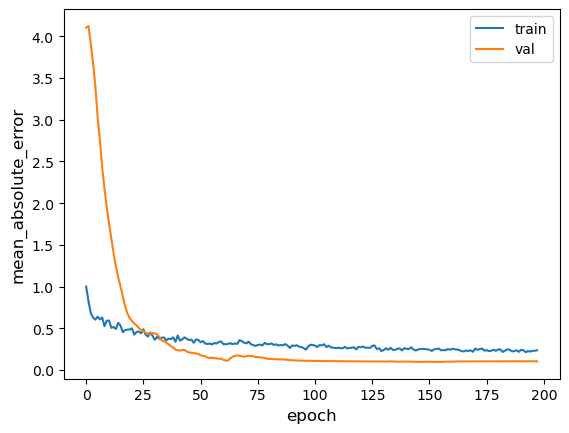

3/3 [==============================] - 0s 1ms/step - loss: 0.1045 - mean_absolute_error: 0.1683
Test accuracy 0.1682763695716858
Test loss 0.10446591675281525


In [62]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [63]:
y_test_pred = multi_dense_model.predict(x_test)

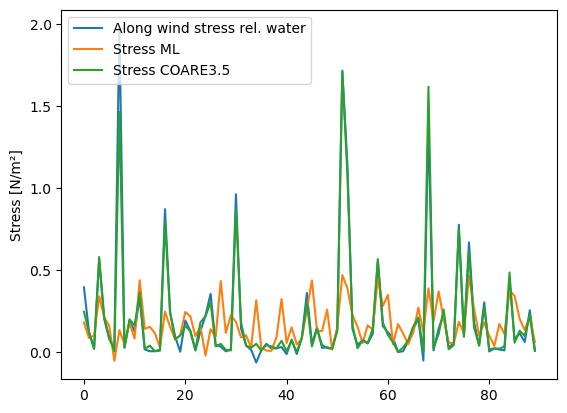

In [64]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [65]:
rmse(y_test.values, y_test_pred)

0.37758593014603475

In [66]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [67]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.43987732],
       [0.43987732, 1.        ]])

In [68]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [69]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [70]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [71]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
1/1 [==============================] - 1s 564ms/step - loss: 1.8883 - mean_absolute_error: 1.0189 - val_loss: 73.1148 - val_mean_absolute_error: 8.1920
Epoch 2/500
1/1 [==============================] - 0s 23ms/step - loss: 1.9890 - mean_absolute_error: 1.0262 - val_loss: 40.9452 - val_mean_absolute_error: 6.1667
Epoch 3/500
1/1 [==============================] - 0s 23ms/step - loss: 1.3796 - mean_absolute_error: 0.8608 - val_loss: 16.5448 - val_mean_absolute_error: 3.8990
Epoch 4/500
1/1 [==============================] - 0s 23ms/step - loss: 1.2208 - mean_absolute_error: 0.8124 - val_loss: 4.2094 - val_mean_absolute_error: 1.8874
Epoch 5/500
1/1 [==============================] - 0s 23ms/step - loss: 1.3536 - mean_absolute_error: 0.8627 - val_loss: 0.6960 - val_mean_absolute_error: 0.6952
Epoch 6/500
1/1 [==============================] - 0s 22ms/step - loss: 1.2576 - mean_absolute_error: 0.8256 - val_loss: 1.1445 - val_mean_absolute_error: 0.8216
Epoch 7/500
1/1 [=======

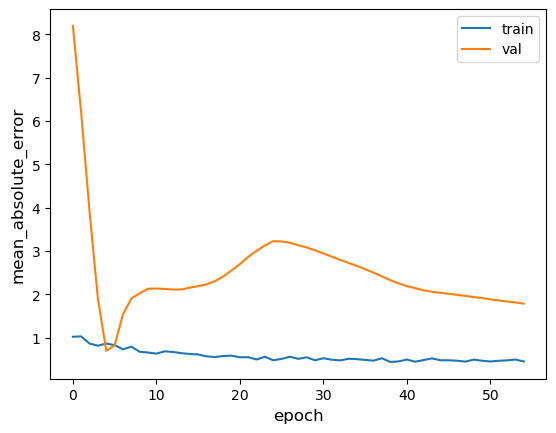

3/3 [==============================] - 0s 1ms/step - loss: 3.2929 - mean_absolute_error: 1.7178
Test accuracy 1.7178075313568115
Test loss 3.2928974628448486


In [72]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [73]:
y_test_pred = multi_dense_model.predict(x_test)

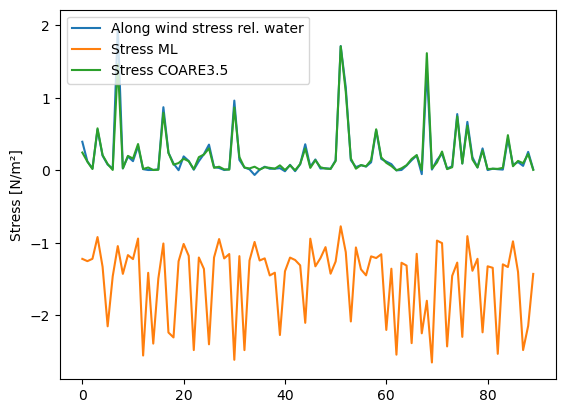

In [74]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [75]:
rmse(y_test.values, y_test_pred)

1.8303785650949376

In [76]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [77]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.15430331],
       [0.15430331, 1.        ]])

In [78]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

#### Very unstable - get different results every time I run it

In [79]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [80]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [81]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
1/1 [==============================] - 1s 924ms/step - loss: 2.0149 - mean_absolute_error: 1.0746 - val_loss: 3.9429 - val_mean_absolute_error: 1.8498
Epoch 2/500
1/1 [==============================] - 0s 28ms/step - loss: 1.0134 - mean_absolute_error: 0.7684 - val_loss: 5.7799 - val_mean_absolute_error: 2.3005
Epoch 3/500
1/1 [==============================] - 0s 26ms/step - loss: 0.9803 - mean_absolute_error: 0.7799 - val_loss: 4.3792 - val_mean_absolute_error: 1.9528
Epoch 4/500
1/1 [==============================] - 0s 26ms/step - loss: 0.7434 - mean_absolute_error: 0.6864 - val_loss: 0.8252 - val_mean_absolute_error: 0.7322
Epoch 5/500
1/1 [==============================] - 0s 28ms/step - loss: 0.8388 - mean_absolute_error: 0.7113 - val_loss: 1.2472 - val_mean_absolute_error: 0.9353
Epoch 6/500
1/1 [==============================] - 0s 27ms/step - loss: 0.6535 - mean_absolute_error: 0.6467 - val_loss: 3.6592 - val_mean_absolute_error: 1.7681
Epoch 7/500
1/1 [==========

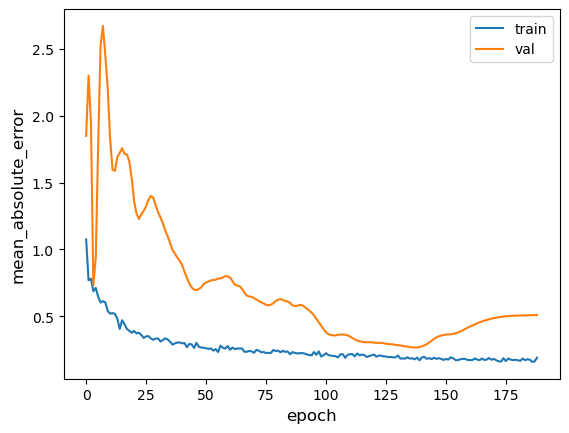

3/3 [==============================] - 0s 1ms/step - loss: 0.4047 - mean_absolute_error: 0.5402
Test accuracy 0.5402089953422546
Test loss 0.404693603515625


In [82]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [83]:
y_test_pred = multi_dense_model.predict(x_test)

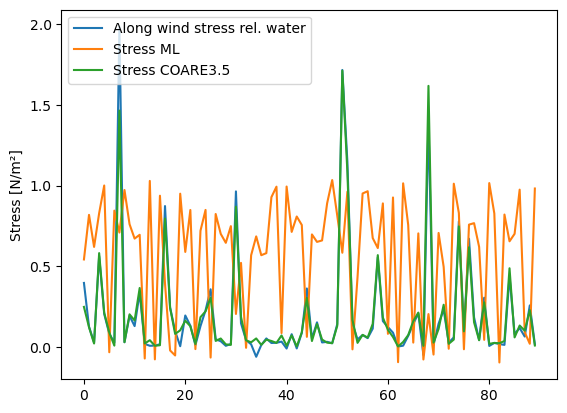

In [84]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [85]:
rmse(y_test.values, y_test_pred)

0.6312318513443403

In [86]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [87]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[ 1.        , -0.02367197],
       [-0.02367197,  1.        ]])

In [88]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

# __________________________________________________

# Using only s0_norm

In [94]:
predictor_variables = ['s0_norm', 'u10', 'v10']

In [95]:
x = df[predictor_variables]
x

s0_norm       u10        v10
300 -14.918911  6.045154   7.037160
381  -8.355029  8.021218  -1.367607
108  -9.694715 -5.669697  -2.507397
94   -6.935540  6.495847  11.473030
289 -11.330360  6.045154   7.037160
..         ...       ...        ...
293  -9.551195  6.045154   7.037160
235  -8.971364  2.151350  -7.729190
84   -7.685976  3.966743  -7.637461
95   -9.699736  7.627155   2.237181
215 -10.245456 -0.009023   1.070539

[410 rows x 3 columns]

In [96]:
y = -  df['UWr'] * df['rhoair']
y

300   -0.003707
381    0.124103
108    0.083250
94     0.229089
289    0.130489
         ...   
293    0.079242
235    0.116743
84     0.063755
95     0.256668
215    0.016093
Length: 410, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

In [97]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [98]:
y_train = y[:split_idx]
y_test = y[split_idx:]

# ML setup

In [99]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [100]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [101]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 15ms/step - loss: 85.3441 - mean_absolute_error: 7.8570 - val_loss: 72.0734 - val_mean_absolute_error: 6.9928
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 83.6375 - mean_absolute_error: 7.6710 - val_loss: 70.4963 - val_mean_absolute_error: 6.9107
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 83.7696 - mean_absolute_error: 7.6899 - val_loss: 68.9490 - val_mean_absolute_error: 6.8288
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 73.7178 - mean_absolute_error: 7.3178 - val_loss: 67.4506 - val_mean_absolute_error: 6.7482
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 74.8660 - mean_absolute_error: 7.3739 - val_loss: 65.9562 - val_mean_absolute_error: 6.6686
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 72.5816 - mean_absolute_error: 7.2653 - val_loss: 64.5051 - val_mean_absolute_error: 6.5918
Epoch 7/500
7/7 [====

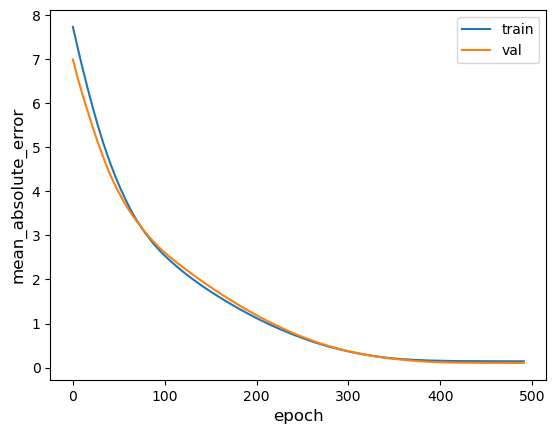

3/3 [==============================] - 0s 1ms/step - loss: 0.0935 - mean_absolute_error: 0.1750
Test accuracy 0.17499969899654388
Test loss 0.09354624152183533


In [102]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [103]:
y_test_pred = multi_dense_model.predict(x_test)

In [104]:
np.mean(y_test)

0.20288953337977453

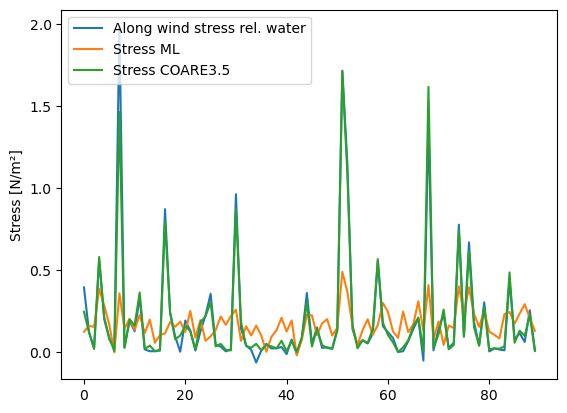

In [105]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [106]:
rmse(y_test.values, y_test_pred)

0.3692621499639257

In [107]:
rmse(y_test.values, c_test)

0.06884559918794826

In [108]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.6408818],
       [0.6408818, 1.       ]])

In [109]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

# Other experiments

In [110]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [111]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [112]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 17ms/step - loss: 1.2681 - mean_absolute_error: 0.9670 - val_loss: 13.6009 - val_mean_absolute_error: 2.8604
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 1.1826 - mean_absolute_error: 0.9122 - val_loss: 8.2017 - val_mean_absolute_error: 2.2115
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 1.1091 - mean_absolute_error: 0.8776 - val_loss: 5.6089 - val_mean_absolute_error: 1.8262
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 1.0147 - mean_absolute_error: 0.8398 - val_loss: 4.1276 - val_mean_absolute_error: 1.5673
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 0.9465 - mean_absolute_error: 0.7715 - val_loss: 3.1790 - val_mean_absolute_error: 1.3787
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 0.7969 - mean_absolute_error: 0.7288 - val_loss: 2.5290 - val_mean_absolute_error: 1.2333
Epoch 7/500
7/7 [===============

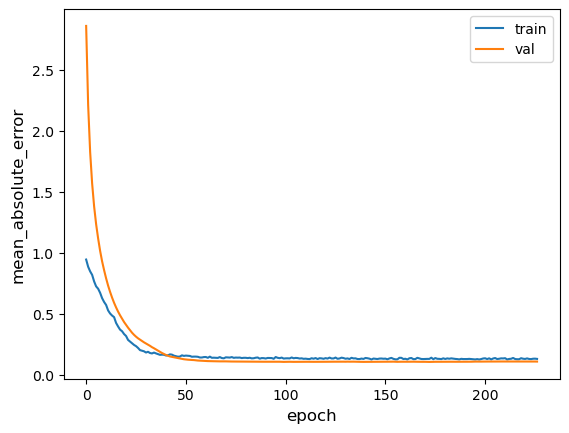

3/3 [==============================] - 0s 1ms/step - loss: 0.0697 - mean_absolute_error: 0.1479
Test accuracy 0.14786513149738312
Test loss 0.06972313672304153


In [113]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [114]:
y_test_pred = multi_dense_model.predict(x_test)

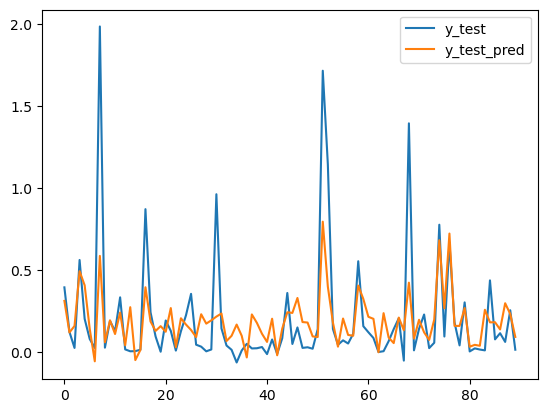

In [115]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [116]:
rmse(y_test.values, y_test_pred)

0.3881267670057817

In [117]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.73849025],
       [0.73849025, 1.        ]])

In [118]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

Text(0, 0.5, 'Stress ML [N/m²]')

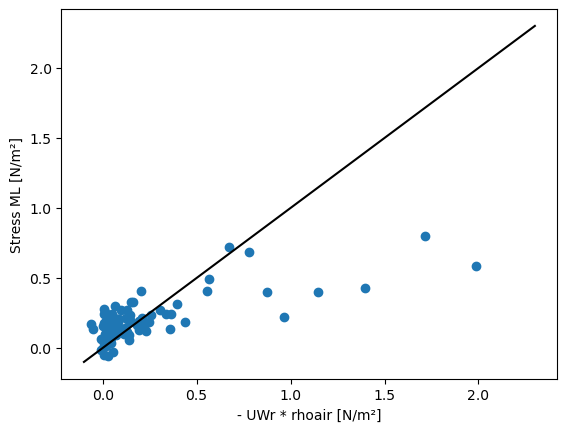

In [120]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [121]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [122]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [123]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 18ms/step - loss: 0.7187 - mean_absolute_error: 0.6948 - val_loss: 2.1215 - val_mean_absolute_error: 0.9079
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6902 - mean_absolute_error: 0.6614 - val_loss: 1.4585 - val_mean_absolute_error: 0.7915
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6522 - mean_absolute_error: 0.6582 - val_loss: 1.0788 - val_mean_absolute_error: 0.7110
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6477 - mean_absolute_error: 0.6698 - val_loss: 0.8450 - val_mean_absolute_error: 0.6514
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6067 - mean_absolute_error: 0.6277 - val_loss: 0.6873 - val_mean_absolute_error: 0.6051
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 0.5010 - mean_absolute_error: 0.5802 - val_loss: 0.5720 - val_mean_absolute_error: 0.5659
Epoch 7/500
7/7 [================

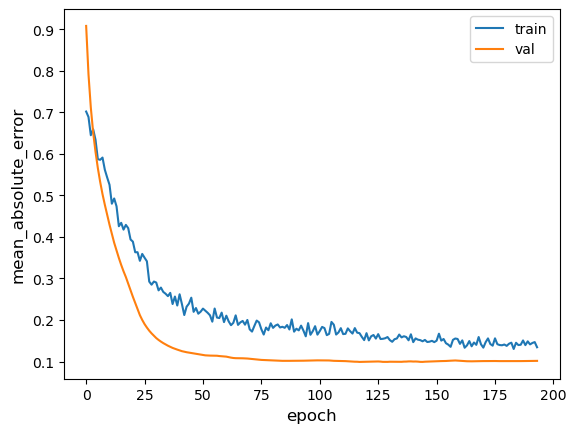

3/3 [==============================] - 0s 1ms/step - loss: 0.0475 - mean_absolute_error: 0.1318
Test accuracy 0.13176028430461884
Test loss 0.047488730400800705


In [124]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [125]:
y_test_pred = multi_dense_model.predict(x_test)

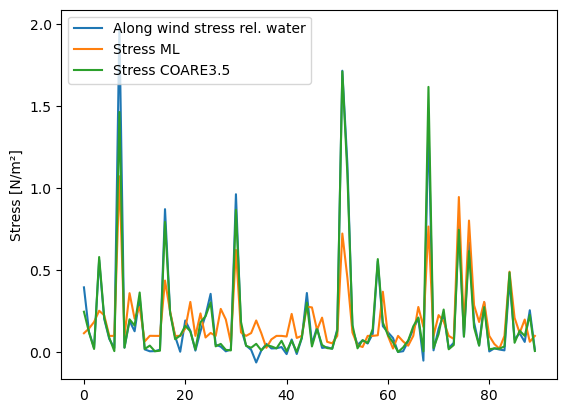

In [126]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [127]:
rmse(y_test.values, y_test_pred)

0.4068881517490139

In [128]:
rmse(c_test.values, y_test.values)

0.06884559918794826

In [129]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.84306616],
       [0.84306616, 1.        ]])

In [130]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

Text(0, 0.5, 'Stress ML [N/m²]')

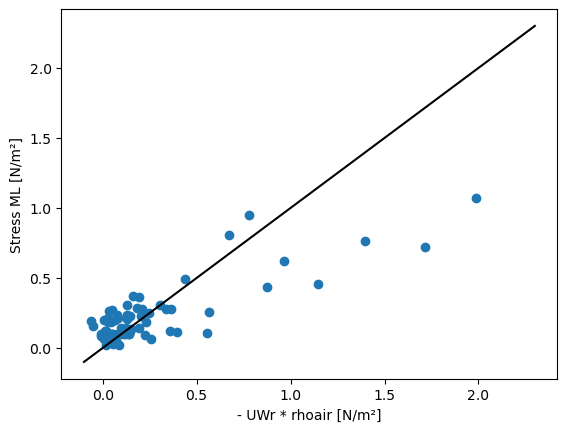

In [131]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [132]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [133]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [134]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 17ms/step - loss: 0.7070 - mean_absolute_error: 0.5025 - val_loss: 0.3218 - val_mean_absolute_error: 0.4187
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6209 - mean_absolute_error: 0.4997 - val_loss: 0.3002 - val_mean_absolute_error: 0.3872
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6412 - mean_absolute_error: 0.4813 - val_loss: 0.2788 - val_mean_absolute_error: 0.3633
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6640 - mean_absolute_error: 0.5011 - val_loss: 0.2592 - val_mean_absolute_error: 0.3449
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 0.4754 - mean_absolute_error: 0.4329 - val_loss: 0.2411 - val_mean_absolute_error: 0.3296
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 0.5603 - mean_absolute_error: 0.4517 - val_loss: 0.2234 - val_mean_absolute_error: 0.3163
Epoch 7/500
7/7 [================

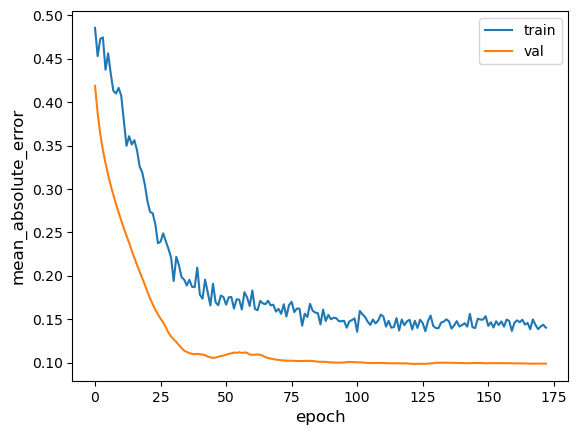

3/3 [==============================] - 0s 1ms/step - loss: 0.0675 - mean_absolute_error: 0.1524
Test accuracy 0.15239907801151276
Test loss 0.06748903542757034


In [135]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [136]:
y_test_pred = multi_dense_model.predict(x_test)

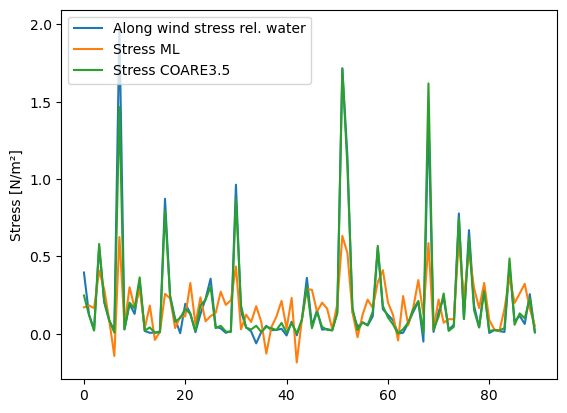

In [137]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [138]:
rmse(y_test.values, y_test_pred)

0.39110561841366154

In [139]:
rmse(c_test.values, y_test.values)

0.06884559918794826

In [140]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.74860605],
       [0.74860605, 1.        ]])

In [141]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [142]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [143]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [144]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
14/14 [==============================] - 0s 9ms/step - loss: 3.6083 - mean_absolute_error: 1.2782 - val_loss: 10.0078 - val_mean_absolute_error: 2.6856
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 3.8020 - mean_absolute_error: 1.2215 - val_loss: 6.0434 - val_mean_absolute_error: 2.0665
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 3.5800 - mean_absolute_error: 1.2938 - val_loss: 4.2123 - val_mean_absolute_error: 1.7061
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 3.0535 - mean_absolute_error: 1.1578 - val_loss: 3.2396 - val_mean_absolute_error: 1.4792
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 3.4383 - mean_absolute_error: 1.1936 - val_loss: 2.6170 - val_mean_absolute_error: 1.3179
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 2.1395 - mean_absolute_error: 1.0275 - val_loss: 2.2226 - val_mean_absolute_error: 1.2030
Epoch 7/500
14/14 [==

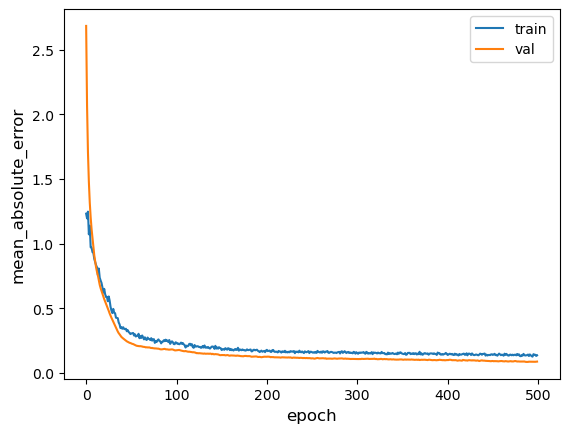

3/3 [==============================] - 0s 1ms/step - loss: 0.0539 - mean_absolute_error: 0.1360
Test accuracy 0.13604770600795746
Test loss 0.05389142036437988


In [145]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [146]:
y_test_pred = multi_dense_model.predict(x_test)

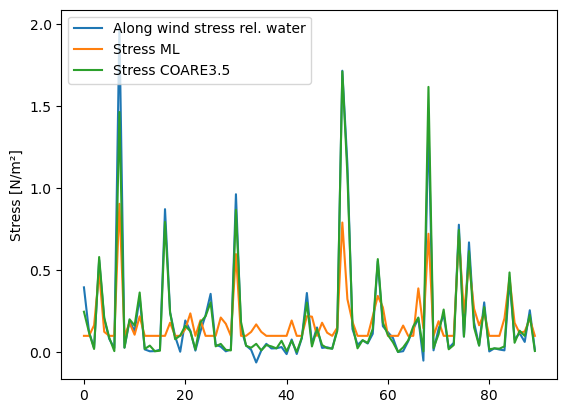

In [147]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [148]:
rmse(y_test.values, y_test_pred)

0.3917713665414226

In [149]:
rmse(y_test.values, c_test)

0.06884559918794826

In [150]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.85994615],
       [0.85994615, 1.        ]])

In [151]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

Text(0, 0.5, 'Stress ML [N/m²]')

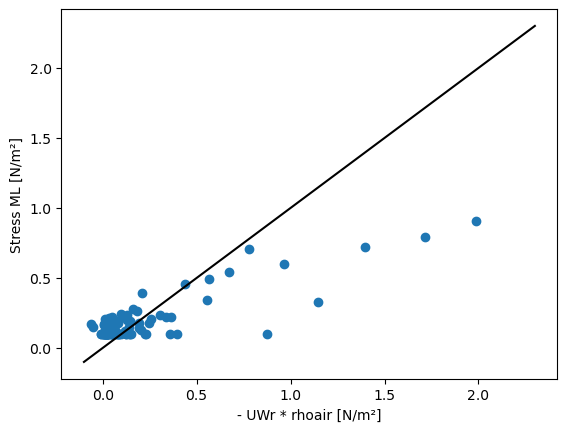

In [152]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [153]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [154]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [155]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 18ms/step - loss: 1.8689 - mean_absolute_error: 0.7515 - val_loss: 3.1520 - val_mean_absolute_error: 1.4741
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 2.0978 - mean_absolute_error: 0.7763 - val_loss: 2.4764 - val_mean_absolute_error: 1.2972
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 2.2329 - mean_absolute_error: 0.7404 - val_loss: 2.0127 - val_mean_absolute_error: 1.1622
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 1.4538 - mean_absolute_error: 0.6820 - val_loss: 1.6757 - val_mean_absolute_error: 1.0568
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 1.5532 - mean_absolute_error: 0.7239 - val_loss: 1.4037 - val_mean_absolute_error: 0.9646
Epoch 6/500
7/7 [==============================] - 0s 5ms/step - loss: 2.4535 - mean_absolute_error: 0.7335 - val_loss: 1.1860 - val_mean_absolute_error: 0.8833
Epoch 7/500
7/7 [================

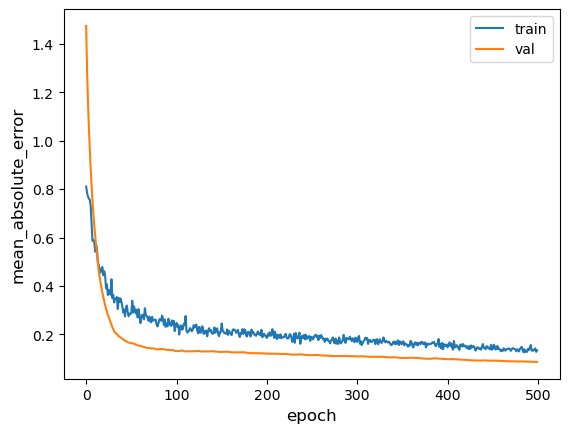

3/3 [==============================] - 0s 1ms/step - loss: 0.0498 - mean_absolute_error: 0.1349
Test accuracy 0.1348627805709839
Test loss 0.04978368058800697


In [156]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [157]:
y_test_pred = multi_dense_model.predict(x_test)

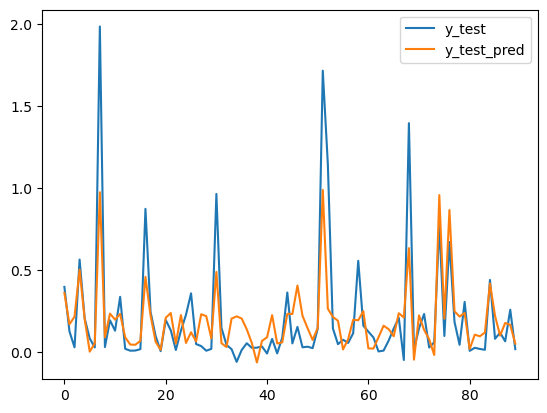

In [158]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [159]:
rmse(y_test.values, y_test_pred)

0.40995545681725787

In [160]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.81890965],
       [0.81890965, 1.        ]])

In [161]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

Text(0, 0.5, 'Stress ML [N/m²]')

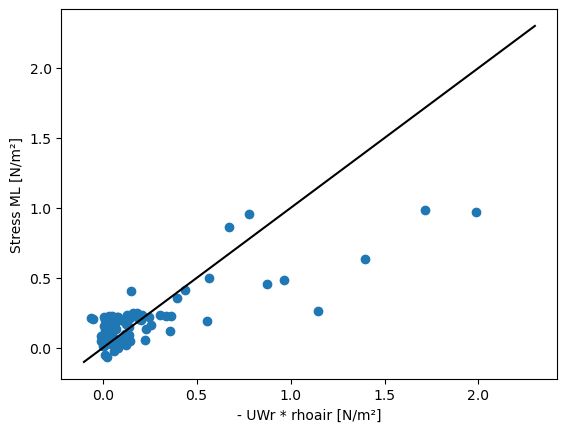

In [162]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [163]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [164]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [165]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 1s 21ms/step - loss: 1.1805 - mean_absolute_error: 0.7782 - val_loss: 4.9240 - val_mean_absolute_error: 1.7369
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 1.3620 - mean_absolute_error: 0.7945 - val_loss: 3.4946 - val_mean_absolute_error: 1.4481
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 0.8691 - mean_absolute_error: 0.6530 - val_loss: 2.6739 - val_mean_absolute_error: 1.2584
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 0.7407 - mean_absolute_error: 0.5905 - val_loss: 2.1663 - val_mean_absolute_error: 1.1209
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 0.5759 - mean_absolute_error: 0.5580 - val_loss: 1.8155 - val_mean_absolute_error: 1.0217
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 0.8138 - mean_absolute_error: 0.6270 - val_loss: 1.5584 - val_mean_absolute_error: 0.9433
Epoch 7/500
7/7 [================

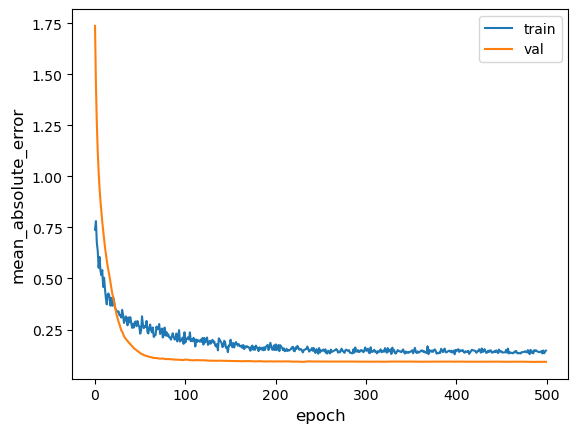

3/3 [==============================] - 0s 1ms/step - loss: 0.0655 - mean_absolute_error: 0.1452
Test accuracy 0.1451752930879593
Test loss 0.0654568001627922


In [166]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [167]:
y_test_pred = multi_dense_model.predict(x_test)

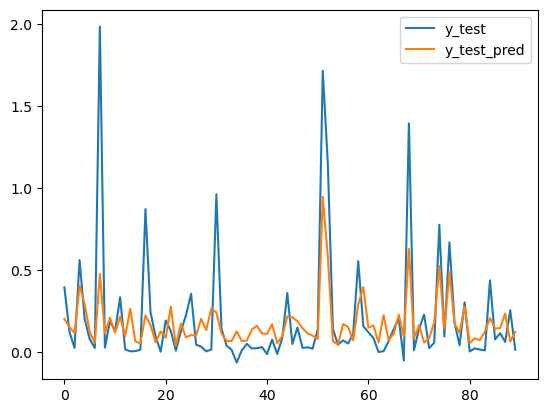

In [168]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [169]:
rmse(y_test.values, y_test_pred)

0.3849213085289665

In [170]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.80993467],
       [0.80993467, 1.        ]])

In [171]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

Text(0, 0.5, 'Stress ML [N/m²]')

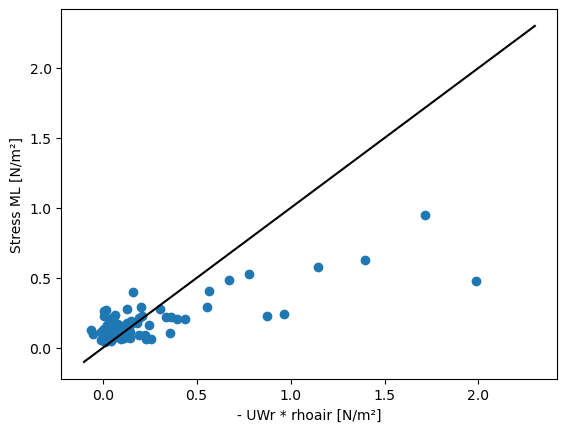

In [172]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [173]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [174]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [175]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
14/14 [==============================] - 1s 28ms/step - loss: 1.3470 - mean_absolute_error: 0.7679 - val_loss: 0.2825 - val_mean_absolute_error: 0.4243
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 0.9141 - mean_absolute_error: 0.5985 - val_loss: 0.1562 - val_mean_absolute_error: 0.3180
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 0.9084 - mean_absolute_error: 0.5721 - val_loss: 0.0971 - val_mean_absolute_error: 0.2492
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 1.0343 - mean_absolute_error: 0.6376 - val_loss: 0.0671 - val_mean_absolute_error: 0.2055
Epoch 5/500
14/14 [==============================] - 0s 3ms/step - loss: 0.9851 - mean_absolute_error: 0.6192 - val_loss: 0.0525 - val_mean_absolute_error: 0.1796
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 0.7508 - mean_absolute_error: 0.5608 - val_loss: 0.0487 - val_mean_absolute_error: 0.1666
Epoch 7/500
14/14 [==

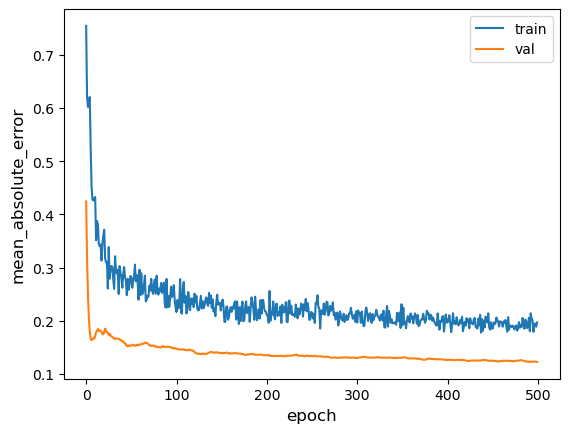

3/3 [==============================] - 0s 1ms/step - loss: 0.1064 - mean_absolute_error: 0.1936
Test accuracy 0.19361072778701782
Test loss 0.10638700425624847


In [176]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [177]:
y_test_pred = multi_dense_model.predict(x_test)

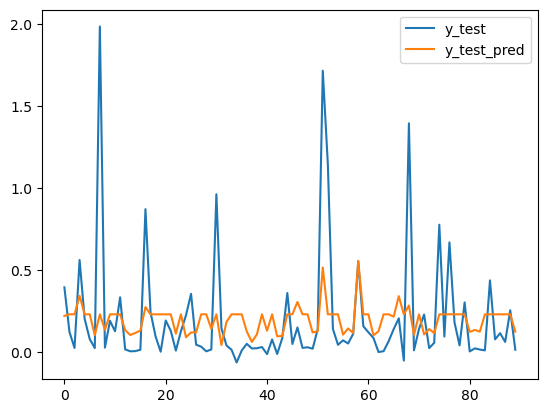

In [178]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [179]:
rmse(y_test.values, y_test_pred)

0.3652683448612724

In [180]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.46958653],
       [0.46958653, 1.        ]])

In [181]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [182]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [183]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [184]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
14/14 [==============================] - 1s 11ms/step - loss: 1.8131 - mean_absolute_error: 0.9375 - val_loss: 0.3593 - val_mean_absolute_error: 0.4700
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 1.4169 - mean_absolute_error: 0.8882 - val_loss: 0.3277 - val_mean_absolute_error: 0.4585
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 1.4648 - mean_absolute_error: 0.8251 - val_loss: 0.3324 - val_mean_absolute_error: 0.4744
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 0.9933 - mean_absolute_error: 0.8049 - val_loss: 0.2643 - val_mean_absolute_error: 0.4338
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 0.9974 - mean_absolute_error: 0.7890 - val_loss: 0.1702 - val_mean_absolute_error: 0.3637
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6830 - mean_absolute_error: 0.6814 - val_loss: 0.1293 - val_mean_absolute_error: 0.3200
Epoch 7/500
14/14 [==

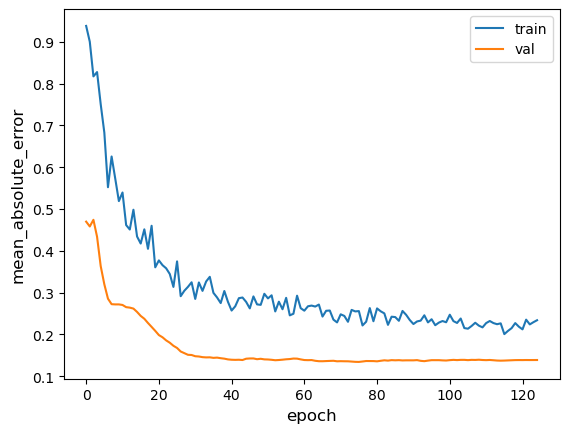

3/3 [==============================] - 0s 1ms/step - loss: 0.1156 - mean_absolute_error: 0.2038
Test accuracy 0.2038392871618271
Test loss 0.11561764776706696


In [185]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [186]:
y_test_pred = multi_dense_model.predict(x_test)

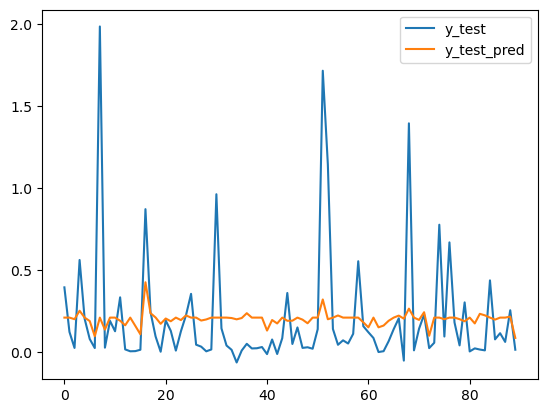

In [187]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [188]:
rmse(y_test.values, y_test_pred)

0.3585098149451204

In [189]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.44670189],
       [0.44670189, 1.        ]])

In [190]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [191]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [192]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [193]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
14/14 [==============================] - 0s 8ms/step - loss: 3.8645 - mean_absolute_error: 1.4352 - val_loss: 3.9202 - val_mean_absolute_error: 1.5035
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 2.9687 - mean_absolute_error: 1.2694 - val_loss: 2.5198 - val_mean_absolute_error: 1.1320
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 2.4217 - mean_absolute_error: 1.1083 - val_loss: 1.8435 - val_mean_absolute_error: 0.9282
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 1.5292 - mean_absolute_error: 0.9124 - val_loss: 1.4767 - val_mean_absolute_error: 0.8562
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 1.1940 - mean_absolute_error: 0.8264 - val_loss: 1.2730 - val_mean_absolute_error: 0.8559
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 0.8520 - mean_absolute_error: 0.6859 - val_loss: 1.1194 - val_mean_absolute_error: 0.8253
Epoch 7/500
14/14 [===

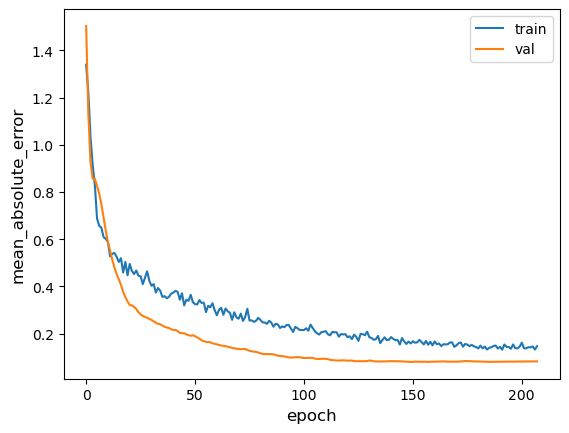

3/3 [==============================] - 0s 1ms/step - loss: 0.0477 - mean_absolute_error: 0.1215
Test accuracy 0.12145134806632996
Test loss 0.047675032168626785


In [194]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [195]:
y_test_pred = multi_dense_model.predict(x_test)

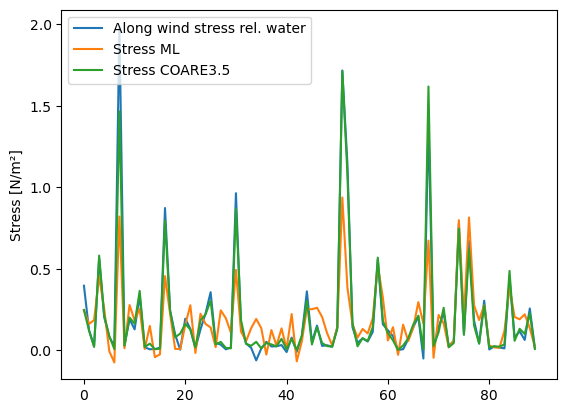

In [196]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [197]:
rmse(y_test.values, y_test_pred)

0.4072532378000242

In [198]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [199]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.84340215],
       [0.84340215, 1.        ]])

In [200]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [201]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [202]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [203]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
14/14 [==============================] - 1s 10ms/step - loss: 0.9564 - mean_absolute_error: 0.6728 - val_loss: 0.7517 - val_mean_absolute_error: 0.5985
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 0.8885 - mean_absolute_error: 0.6822 - val_loss: 0.4736 - val_mean_absolute_error: 0.4560
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 0.8590 - mean_absolute_error: 0.6377 - val_loss: 0.3122 - val_mean_absolute_error: 0.3764
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 0.7824 - mean_absolute_error: 0.6180 - val_loss: 0.2147 - val_mean_absolute_error: 0.3235
Epoch 5/500
14/14 [==============================] - 0s 3ms/step - loss: 0.3971 - mean_absolute_error: 0.4698 - val_loss: 0.1653 - val_mean_absolute_error: 0.2876
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 0.4806 - mean_absolute_error: 0.5173 - val_loss: 0.1321 - val_mean_absolute_error: 0.2607
Epoch 7/500
14/14 [==

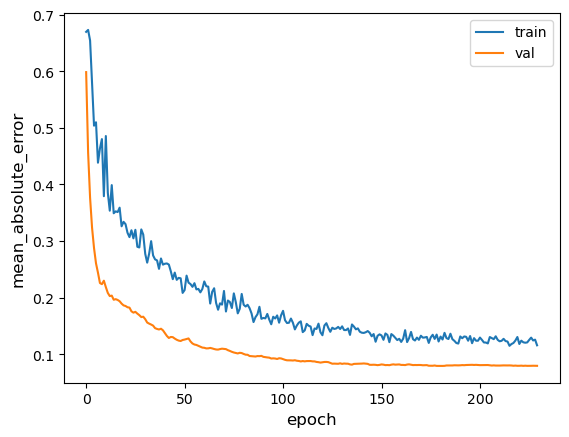

3/3 [==============================] - 0s 1ms/step - loss: 0.0408 - mean_absolute_error: 0.1156
Test accuracy 0.11559130251407623
Test loss 0.04077906534075737


In [204]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [205]:
y_test_pred = multi_dense_model.predict(x_test)

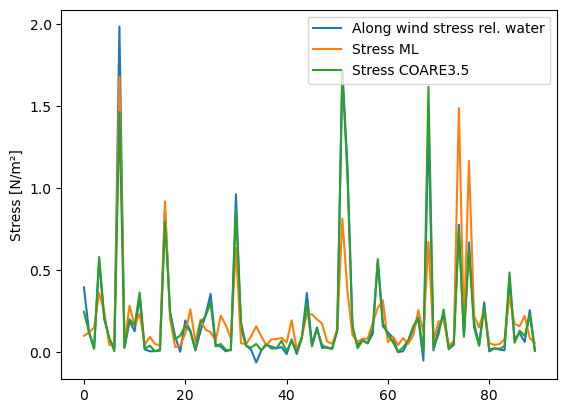

In [206]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [207]:
rmse(y_test.values, y_test_pred)

0.4535169325029152

In [208]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [209]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.82458818],
       [0.82458818, 1.        ]])

In [210]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [211]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [212]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [213]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 1s 19ms/step - loss: 1.5315 - mean_absolute_error: 0.9421 - val_loss: 6.5819 - val_mean_absolute_error: 2.3783
Epoch 2/500
7/7 [==============================] - 0s 5ms/step - loss: 1.1477 - mean_absolute_error: 0.8123 - val_loss: 4.6743 - val_mean_absolute_error: 2.0180
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 0.9017 - mean_absolute_error: 0.7593 - val_loss: 3.4352 - val_mean_absolute_error: 1.7369
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 0.7062 - mean_absolute_error: 0.6518 - val_loss: 2.6063 - val_mean_absolute_error: 1.5134
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 0.5299 - mean_absolute_error: 0.5794 - val_loss: 2.0320 - val_mean_absolute_error: 1.3332
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6094 - mean_absolute_error: 0.5570 - val_loss: 1.6176 - val_mean_absolute_error: 1.1824
Epoch 7/500
7/7 [================

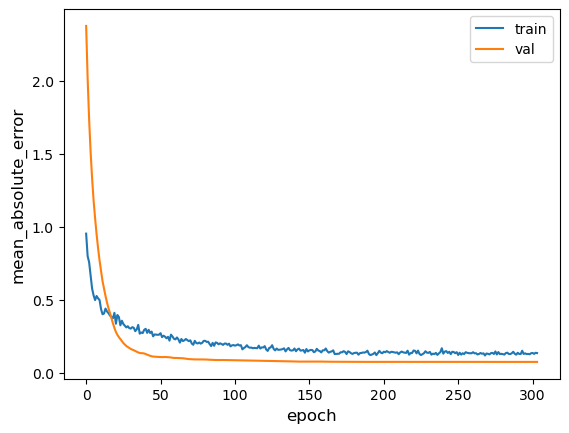

3/3 [==============================] - 0s 1ms/step - loss: 0.0439 - mean_absolute_error: 0.1143
Test accuracy 0.11433997750282288
Test loss 0.04391089826822281


In [214]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [215]:
y_test_pred = multi_dense_model.predict(x_test)

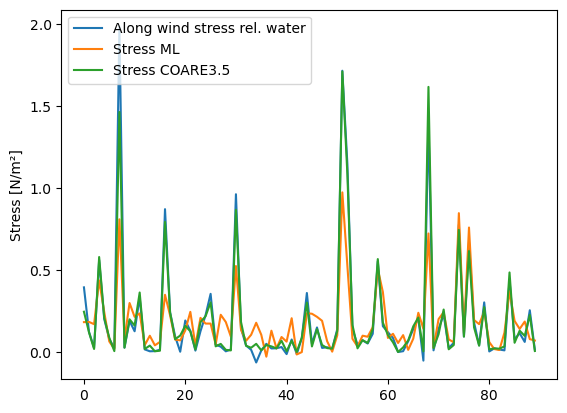

In [216]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [217]:
rmse(y_test.values, y_test_pred)

0.40534557696892237

In [218]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [219]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.87668444],
       [0.87668444, 1.        ]])

In [220]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [221]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [222]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [223]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
1/1 [==============================] - 1s 578ms/step - loss: 2.4227 - mean_absolute_error: 1.1839 - val_loss: 1.1992 - val_mean_absolute_error: 0.9690
Epoch 2/500
1/1 [==============================] - 0s 27ms/step - loss: 1.9848 - mean_absolute_error: 1.0151 - val_loss: 0.9469 - val_mean_absolute_error: 0.8562
Epoch 3/500
1/1 [==============================] - 0s 26ms/step - loss: 1.9996 - mean_absolute_error: 0.9343 - val_loss: 0.7424 - val_mean_absolute_error: 0.7511
Epoch 4/500
1/1 [==============================] - 0s 25ms/step - loss: 1.7270 - mean_absolute_error: 0.9430 - val_loss: 0.5802 - val_mean_absolute_error: 0.6528
Epoch 5/500
1/1 [==============================] - 0s 26ms/step - loss: 1.2755 - mean_absolute_error: 0.8349 - val_loss: 0.4578 - val_mean_absolute_error: 0.5665
Epoch 6/500
1/1 [==============================] - 0s 25ms/step - loss: 1.2698 - mean_absolute_error: 0.7849 - val_loss: 0.3655 - val_mean_absolute_error: 0.4906
Epoch 7/500
1/1 [==========

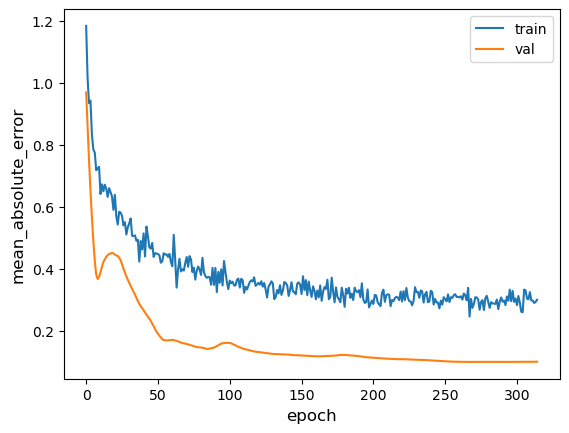

3/3 [==============================] - 0s 990us/step - loss: 0.0471 - mean_absolute_error: 0.1332
Test accuracy 0.13315658271312714
Test loss 0.04705033823847771


In [224]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [225]:
y_test_pred = multi_dense_model.predict(x_test)

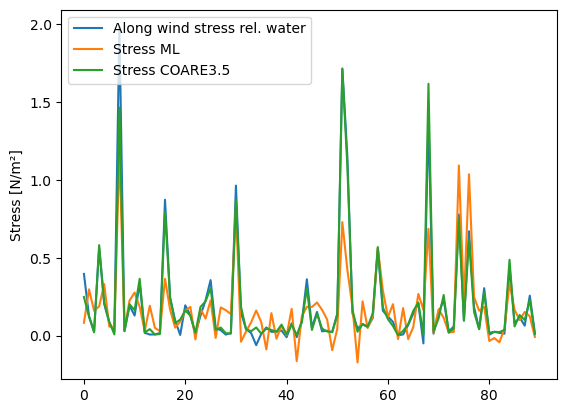

In [226]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [227]:
rmse(y_test.values, y_test_pred)

0.4296657529619439

In [228]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [229]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.80960469],
       [0.80960469, 1.        ]])

In [230]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [231]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [232]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [233]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
1/1 [==============================] - 1s 737ms/step - loss: 1.3904 - mean_absolute_error: 0.9373 - val_loss: 1.0779 - val_mean_absolute_error: 0.9128
Epoch 2/500
1/1 [==============================] - 0s 25ms/step - loss: 1.2396 - mean_absolute_error: 0.8744 - val_loss: 1.0619 - val_mean_absolute_error: 0.9122
Epoch 3/500
1/1 [==============================] - 0s 24ms/step - loss: 1.0109 - mean_absolute_error: 0.8147 - val_loss: 1.0446 - val_mean_absolute_error: 0.9104
Epoch 4/500
1/1 [==============================] - 0s 24ms/step - loss: 0.8600 - mean_absolute_error: 0.7351 - val_loss: 1.0406 - val_mean_absolute_error: 0.9147
Epoch 5/500
1/1 [==============================] - 0s 24ms/step - loss: 1.0878 - mean_absolute_error: 0.7889 - val_loss: 1.0298 - val_mean_absolute_error: 0.9137
Epoch 6/500
1/1 [==============================] - 0s 24ms/step - loss: 0.9424 - mean_absolute_error: 0.7648 - val_loss: 1.0210 - val_mean_absolute_error: 0.9124
Epoch 7/500
1/1 [==========

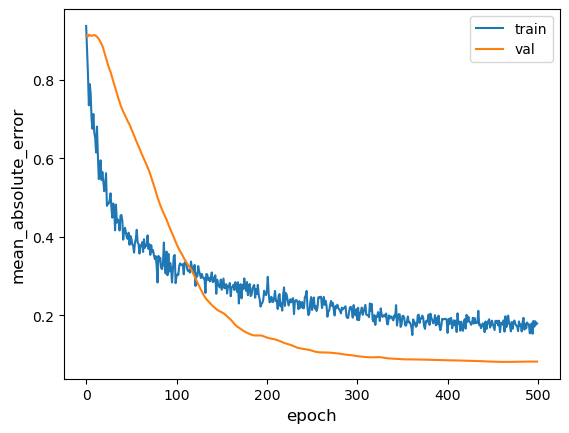

3/3 [==============================] - 0s 976us/step - loss: 0.0430 - mean_absolute_error: 0.1231
Test accuracy 0.12308530509471893
Test loss 0.04304548725485802


In [234]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [235]:
y_test_pred = multi_dense_model.predict(x_test)

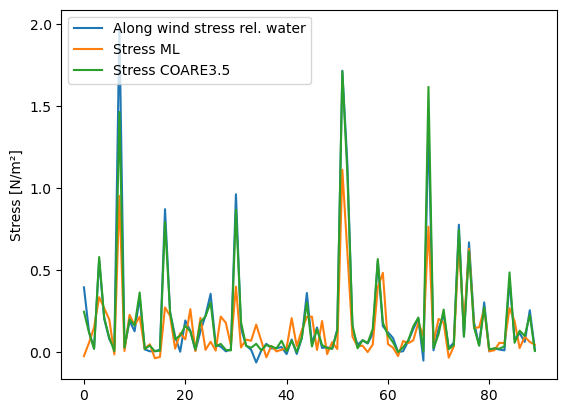

In [236]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [237]:
rmse(y_test.values, y_test_pred)

0.4146381703084717

In [238]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [239]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.87792784],
       [0.87792784, 1.        ]])

In [240]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

Text(0, 0.5, 'Stress ML [N/m²]')

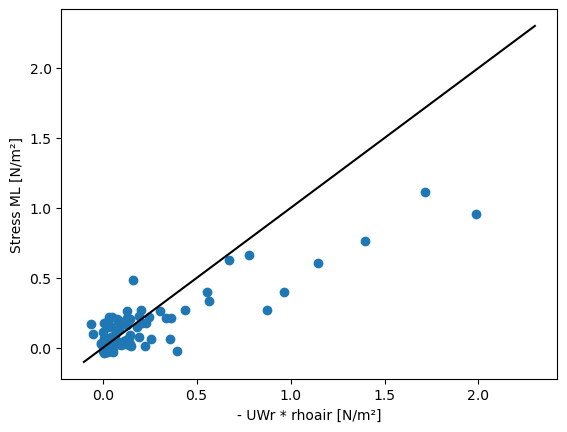

In [241]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

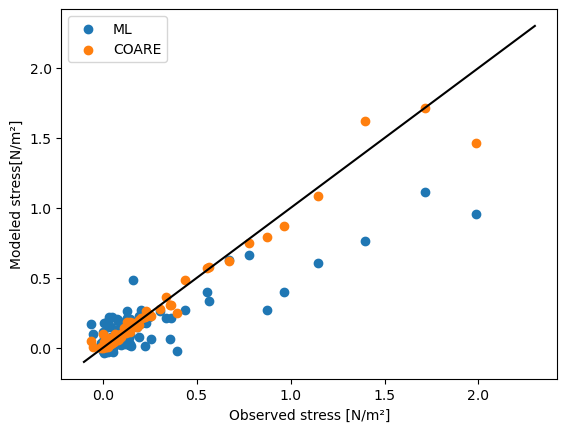

In [242]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

# predictors to use for the ML and validation: extraction


ml_predictors = [
    # # electromagnetic fluxes
    "IR",
    "Solar",
    # #---------- 
    # # specific humidities
    "Q10",
    "SSQ",
    "Qair",
    # #---------- 
    # # relative humidities
    "RH",
    # "RH10",
    # #---------- 
    # # air characteristics
    # "rhoair",
    # "P10",
    # "Pair",
    # #---------- 
    # # temperatures
    "SST",
    "T10",
    # "Tair",
    "Tsea",
    # "Tseasonic",
    # "Tsonic",
    # #---------- 
    # # waves
    # "Tm",
    "Tp",
    # "cp",
    "sigH",
    "sigHDir",
    # #---------- 
    # # wind characteristics
    # "U10e",
    "U10r",
    # "Ue",
    # "Ur",
    # "Wdir",
    "Wdirr",
    # #---------- 
    # # Obukhov scaling
    "moL",
    # "moLcbrt",
    # "moLclipped",
    # "moLinv",
    # #---------- 
    # # bulk fluxes
    "lhf",
    "shf",
    # # ----------
    # # composite variables
    # 'windspeed_over_wavecp',
    # 'mismatch_winddir_wavedir',
    # 'difference_specific_humidity',
    # # ----------
    # # others
    # "WTr",
    ## "Lv",
    # "stress",
]


# __________________________________________________

# s0_norm, inc, az

In [243]:
predictor_variables = ['s0_norm', 'inc', 'az', 'u10', 'v10']

In [244]:
x = df[predictor_variables]
x

s0_norm        inc          az       u10        v10
300 -14.918911  40.733684  280.224518  6.045154   7.037160
381  -8.355029  40.732366  280.222870  8.021218  -1.367607
108  -9.694715  40.723802  280.224518 -5.669697  -2.507397
94   -6.935540  42.400538  440.389984  6.495847  11.473030
289 -11.330360  33.757924  282.000641  6.045154   7.037160
..         ...        ...         ...       ...        ...
293  -9.551195  33.754719  282.000427  6.045154   7.037160
235  -8.971364  40.732870  280.222595  2.151350  -7.729190
84   -7.685976  42.397246  440.389404  3.966743  -7.637461
95   -9.699736  31.666229  439.104034  7.627155   2.237181
215 -10.245456  40.732127  280.224121 -0.009023   1.070539

[410 rows x 5 columns]

In [245]:
y = -  df['UWr'] * df['rhoair']
y

300   -0.003707
381    0.124103
108    0.083250
94     0.229089
289    0.130489
         ...   
293    0.079242
235    0.116743
84     0.063755
95     0.256668
215    0.016093
Length: 410, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

In [246]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [247]:
y_train = y[:split_idx]
y_test = y[split_idx:]

# ML setup

In [248]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [249]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [250]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 17ms/step - loss: 31992.4565 - mean_absolute_error: 175.4091 - val_loss: 34864.6055 - val_mean_absolute_error: 182.7169
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 31996.5010 - mean_absolute_error: 175.2348 - val_loss: 33851.6250 - val_mean_absolute_error: 180.0343
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 30770.9187 - mean_absolute_error: 172.0199 - val_loss: 32857.0977 - val_mean_absolute_error: 177.3612
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 29491.9287 - mean_absolute_error: 168.4671 - val_loss: 31884.5859 - val_mean_absolute_error: 174.7078
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 29473.2576 - mean_absolute_error: 168.1228 - val_loss: 30925.8613 - val_mean_absolute_error: 172.0522
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 29325.3628 - mean_absolute_error: 167.6200 - val_loss: 29988.38

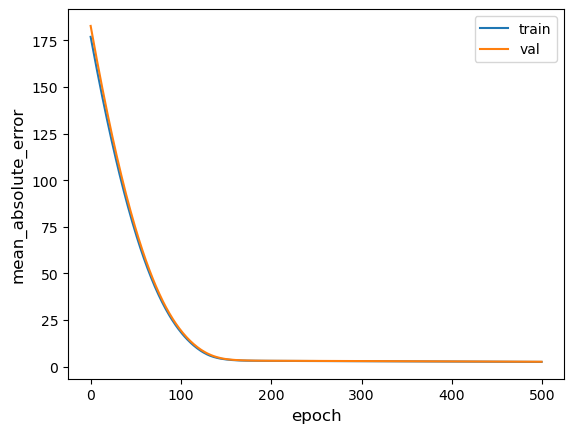

3/3 [==============================] - 0s 1ms/step - loss: 11.0526 - mean_absolute_error: 2.8184
Test accuracy 2.8183679580688477
Test loss 11.052594184875488


In [251]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [252]:
y_test_pred = multi_dense_model.predict(x_test)

In [253]:
np.mean(y_test)

0.20288953337977453

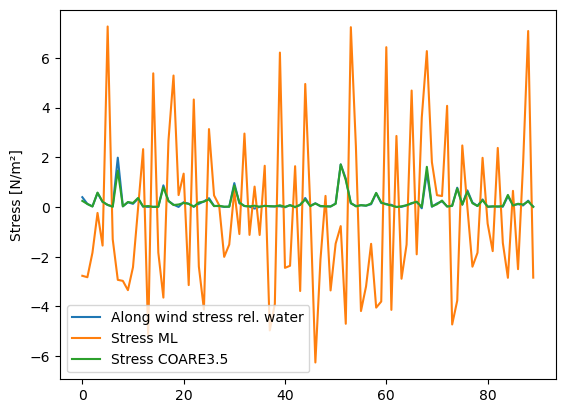

In [254]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [255]:
rmse(y_test.values, y_test_pred)

3.303651888593487

In [256]:
rmse(y_test.values, c_test)

0.06884559918794826

In [257]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[ 1.        , -0.05993401],
       [-0.05993401,  1.        ]])

In [258]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

# Other experiments

In [259]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [260]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [261]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
14/14 [==============================] - 0s 9ms/step - loss: 0.4833 - mean_absolute_error: 0.5189 - val_loss: 4.5413 - val_mean_absolute_error: 1.8387
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 0.4584 - mean_absolute_error: 0.5019 - val_loss: 1.3526 - val_mean_absolute_error: 0.9728
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 0.2597 - mean_absolute_error: 0.3697 - val_loss: 0.4281 - val_mean_absolute_error: 0.5399
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2971 - mean_absolute_error: 0.3940 - val_loss: 0.2570 - val_mean_absolute_error: 0.4250
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2426 - mean_absolute_error: 0.3631 - val_loss: 0.2840 - val_mean_absolute_error: 0.4563
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2008 - mean_absolute_error: 0.3420 - val_loss: 0.3308 - val_mean_absolute_error: 0.5067
Epoch 7/500
14/14 [===

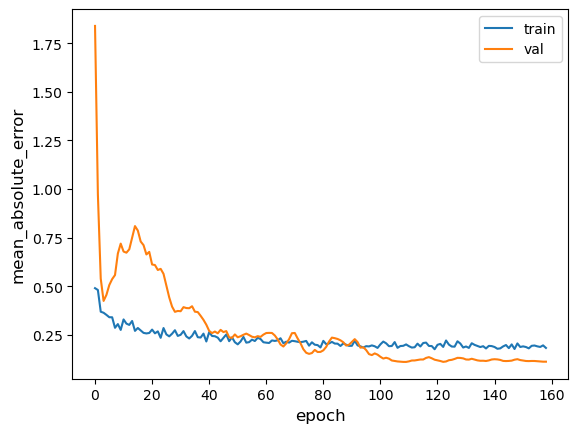

3/3 [==============================] - 0s 1ms/step - loss: 0.0808 - mean_absolute_error: 0.1634
Test accuracy 0.16344644129276276
Test loss 0.08084956556558609


In [262]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [263]:
y_test_pred = multi_dense_model.predict(x_test)

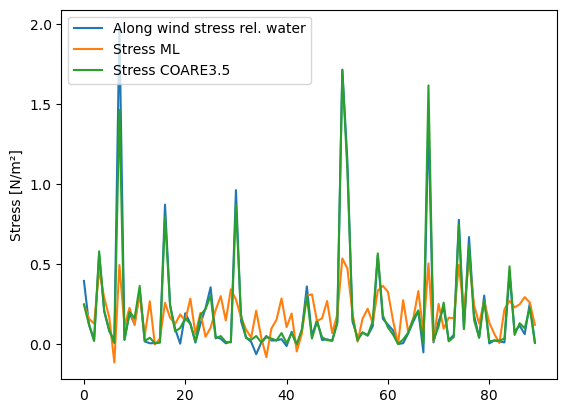

In [264]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [265]:
rmse(y_test.values, y_test_pred)

0.3808859138738159

In [266]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [267]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.66997952],
       [0.66997952, 1.        ]])

In [268]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [269]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [270]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [271]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
14/14 [==============================] - 1s 10ms/step - loss: 0.4495 - mean_absolute_error: 0.5209 - val_loss: 0.4741 - val_mean_absolute_error: 0.6139
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 0.4590 - mean_absolute_error: 0.5313 - val_loss: 0.0607 - val_mean_absolute_error: 0.1947
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 0.2709 - mean_absolute_error: 0.4158 - val_loss: 0.0573 - val_mean_absolute_error: 0.1870
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 0.2518 - mean_absolute_error: 0.3692 - val_loss: 0.0824 - val_mean_absolute_error: 0.2278
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2265 - mean_absolute_error: 0.3655 - val_loss: 0.0814 - val_mean_absolute_error: 0.2269
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2241 - mean_absolute_error: 0.3658 - val_loss: 0.0724 - val_mean_absolute_error: 0.2103
Epoch 7/500
14/14 [==

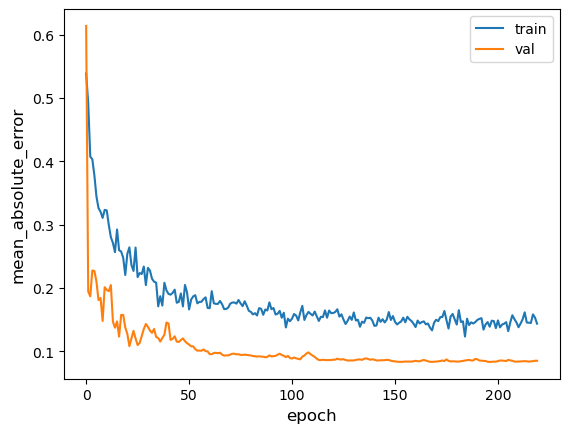

3/3 [==============================] - 0s 1ms/step - loss: 0.0681 - mean_absolute_error: 0.1418
Test accuracy 0.14176295697689056
Test loss 0.06809260696172714


In [272]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [273]:
y_test_pred = multi_dense_model.predict(x_test)

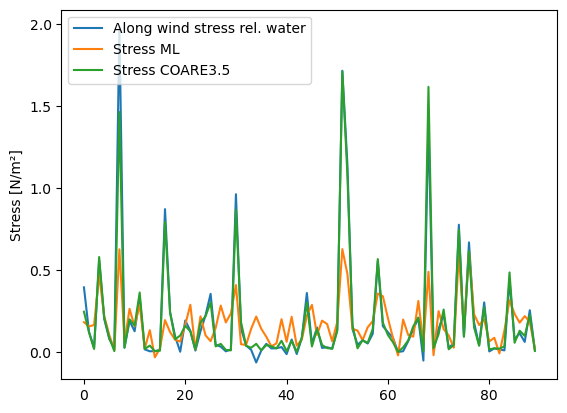

In [274]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [275]:
rmse(y_test.values, y_test_pred)

0.3850069670623458

In [276]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [277]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.78100425],
       [0.78100425, 1.        ]])

In [278]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [279]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [280]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [281]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
1/1 [==============================] - 1s 709ms/step - loss: 2.8776 - mean_absolute_error: 1.2669 - val_loss: 0.8382 - val_mean_absolute_error: 0.7675
Epoch 2/500
1/1 [==============================] - 0s 28ms/step - loss: 1.6141 - mean_absolute_error: 0.9837 - val_loss: 0.9024 - val_mean_absolute_error: 0.8782
Epoch 3/500
1/1 [==============================] - 0s 27ms/step - loss: 1.1614 - mean_absolute_error: 0.8424 - val_loss: 1.7332 - val_mean_absolute_error: 1.2410
Epoch 4/500
1/1 [==============================] - 0s 25ms/step - loss: 0.9082 - mean_absolute_error: 0.7666 - val_loss: 1.0403 - val_mean_absolute_error: 0.9718
Epoch 5/500
1/1 [==============================] - 0s 26ms/step - loss: 0.9267 - mean_absolute_error: 0.7104 - val_loss: 1.7179 - val_mean_absolute_error: 1.2708
Epoch 6/500
1/1 [==============================] - 0s 26ms/step - loss: 0.7441 - mean_absolute_error: 0.6747 - val_loss: 2.6516 - val_mean_absolute_error: 1.5928
Epoch 7/500
1/1 [==========

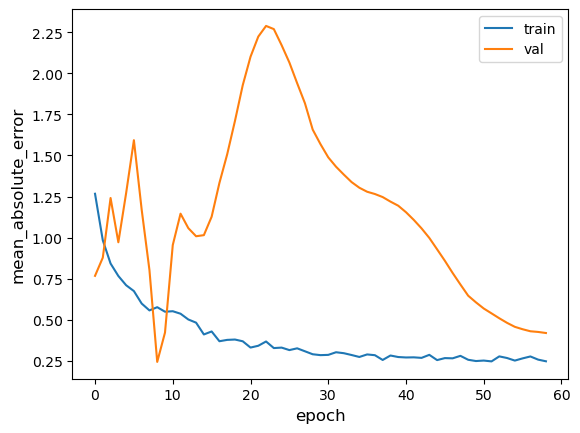

3/3 [==============================] - 0s 1ms/step - loss: 0.3259 - mean_absolute_error: 0.4251
Test accuracy 0.42510291934013367
Test loss 0.3259364664554596


In [282]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [283]:
y_test_pred = multi_dense_model.predict(x_test)

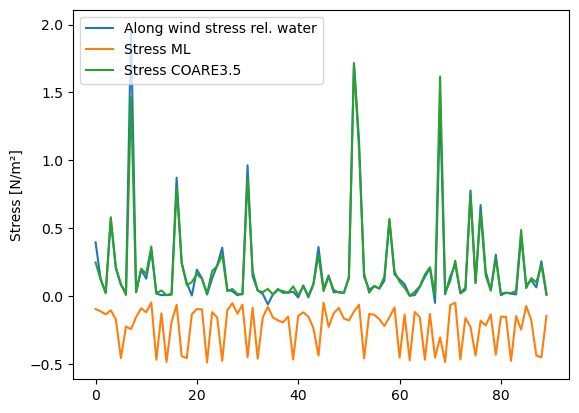

In [284]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [285]:
rmse(y_test.values, y_test_pred)

0.5739627187243097

In [286]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [287]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.03321207],
       [0.03321207, 1.        ]])

In [288]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

# __________________________________________________

# s0, s0_max, S0_min, inc, az

## s0 is the average

In [289]:
predictor_variables = ['s0', 's0_max', 's0_min', 'inc', 'az', 'u10', 'v10']

In [290]:
x = df[predictor_variables]
x

s0     s0_max     s0_min        inc          az       u10  \
300 -29.809161 -29.809161 -29.809161  40.733684  280.224518  6.045154   
381 -16.680374 -16.680374 -16.680374  40.732366  280.222870  8.021218   
108 -19.353100 -19.353100 -19.353100  40.723802  280.224518 -5.669697   
94  -15.135897 -15.135897 -15.135897  42.400538  440.389984  6.495847   
289 -17.218870 -17.218870 -17.218870  33.757924  282.000641  6.045154   
..         ...        ...        ...        ...         ...       ...   
293 -13.658052 -13.658052 -13.658052  33.754719  282.000427  6.045154   
235 -17.913435 -17.913435 -17.913435  40.732870  280.222595  2.151350   
84  -16.634214 -16.634214 -16.634214  42.397246  440.389404  3.966743   
95  -12.334466 -12.334466 -12.334466  31.666229  439.104034  7.627155   
215 -20.461043 -20.461043 -20.461043  40.732127  280.224121 -0.009023   

           v10  
300   7.037160  
381  -1.367607  
108  -2.507397  
94   11.473030  
289   7.037160  
..         ...  
293   7.037160  
235  -7.729190  
84   -7.637461  
95    2.237181  
215   1.070539  

[410 rows x 7 columns]

In [291]:
y = -  df['UWr'] * df['rhoair']
y

300   -0.003707
381    0.124103
108    0.083250
94     0.229089
289    0.130489
         ...   
293    0.079242
235    0.116743
84     0.063755
95     0.256668
215    0.016093
Length: 410, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

In [292]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [293]:
y_train = y[:split_idx]
y_test = y[split_idx:]

# ML setup

In [294]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [295]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [296]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 15ms/step - loss: 8014.6108 - mean_absolute_error: 86.6133 - val_loss: 8189.7383 - val_mean_absolute_error: 87.0692
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 7048.2581 - mean_absolute_error: 80.9958 - val_loss: 7660.6792 - val_mean_absolute_error: 84.1054
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 6774.8288 - mean_absolute_error: 79.2163 - val_loss: 7150.7383 - val_mean_absolute_error: 81.1477
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 6603.8920 - mean_absolute_error: 77.9595 - val_loss: 6664.6372 - val_mean_absolute_error: 78.2256
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 5857.1991 - mean_absolute_error: 73.3051 - val_loss: 6205.8540 - val_mean_absolute_error: 75.3650
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 5934.2153 - mean_absolute_error: 73.7726 - val_loss: 5767.9595 - val_mean_absolute_

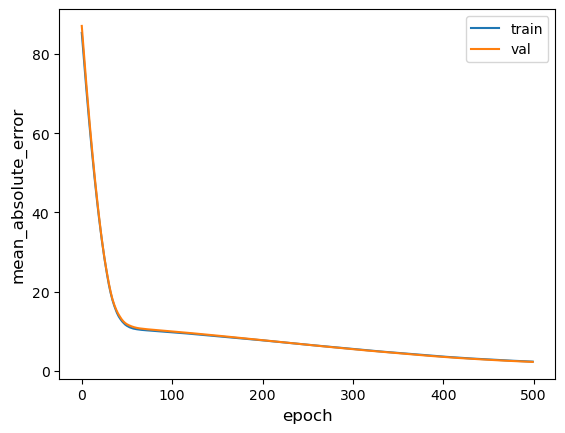

3/3 [==============================] - 0s 1ms/step - loss: 8.7678 - mean_absolute_error: 2.3153
Test accuracy 2.315291404724121
Test loss 8.767827987670898


In [297]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [298]:
y_test_pred = multi_dense_model.predict(x_test)

In [299]:
np.mean(y_test)

0.20288953337977453

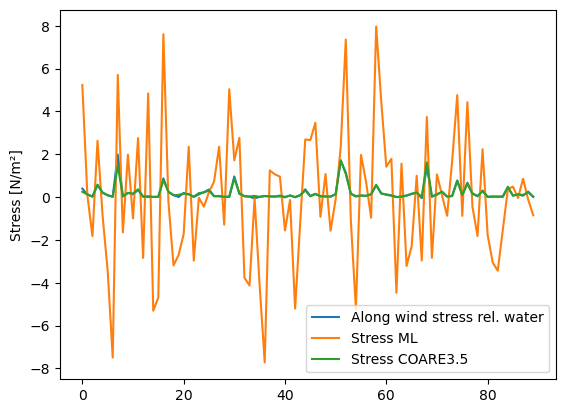

In [300]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [301]:
rmse(y_test.values, y_test_pred)

3.1597068183175607

In [302]:
rmse(y_test.values, c_test)

0.06884559918794826

In [303]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.54485173],
       [0.54485173, 1.        ]])

In [304]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

# Other experiments

In [305]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [306]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [307]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
14/14 [==============================] - 0s 9ms/step - loss: 0.5605 - mean_absolute_error: 0.5653 - val_loss: 123.4018 - val_mean_absolute_error: 10.9891
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3710 - mean_absolute_error: 0.4724 - val_loss: 46.3813 - val_mean_absolute_error: 6.7209
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2836 - mean_absolute_error: 0.3945 - val_loss: 18.7154 - val_mean_absolute_error: 4.2515
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 0.1804 - mean_absolute_error: 0.3205 - val_loss: 7.9364 - val_mean_absolute_error: 2.7518
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 0.1362 - mean_absolute_error: 0.2750 - val_loss: 4.0668 - val_mean_absolute_error: 1.9574
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 0.1676 - mean_absolute_error: 0.3054 - val_loss: 2.0174 - val_mean_absolute_error: 1.3616
Epoch 7/500
14/14

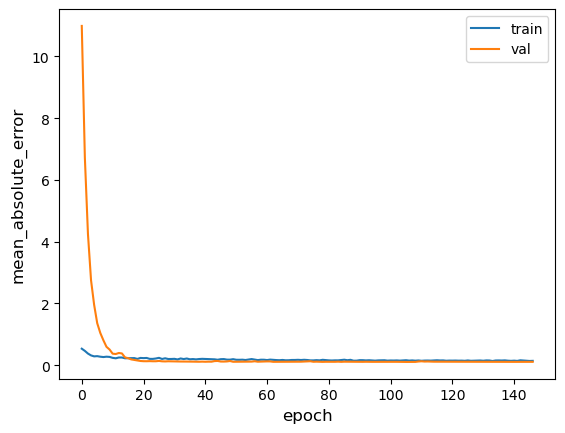

3/3 [==============================] - 0s 1ms/step - loss: 0.0765 - mean_absolute_error: 0.1576
Test accuracy 0.15762393176555634
Test loss 0.07649102807044983


In [308]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [309]:
y_test_pred = multi_dense_model.predict(x_test)

In [310]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [311]:
rmse(y_test.values, y_test_pred)

0.3923958896592124

In [312]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [313]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.67132483],
       [0.67132483, 1.        ]])

In [314]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [315]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [316]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [317]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
14/14 [==============================] - 1s 10ms/step - loss: 1.4565 - mean_absolute_error: 0.9866 - val_loss: 205.7145 - val_mean_absolute_error: 13.8798
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 1.1265 - mean_absolute_error: 0.8454 - val_loss: 72.4784 - val_mean_absolute_error: 8.1283
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 0.8358 - mean_absolute_error: 0.7593 - val_loss: 35.2071 - val_mean_absolute_error: 5.5710
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 0.7420 - mean_absolute_error: 0.6930 - val_loss: 20.0736 - val_mean_absolute_error: 4.1114
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6740 - mean_absolute_error: 0.6194 - val_loss: 13.2264 - val_mean_absolute_error: 3.2459
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6478 - mean_absolute_error: 0.6022 - val_loss: 9.3441 - val_mean_absolute_error: 2.6233
Epoch 7/500
14

In [318]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

3/3 [==============================] - 0s 1ms/step - loss: 0.0839 - mean_absolute_error: 0.1484
Test accuracy 0.14840330183506012
Test loss 0.08391717076301575


In [319]:
y_test_pred = multi_dense_model.predict(x_test)

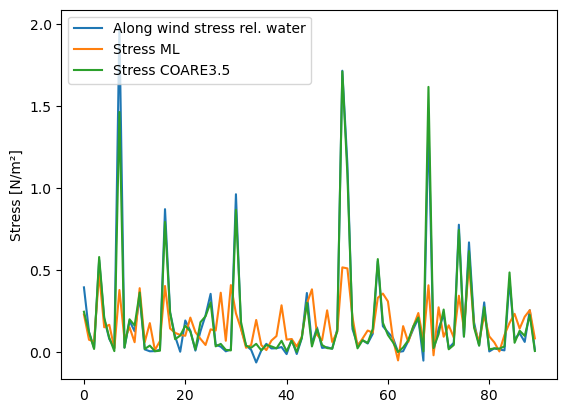

In [320]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [321]:
rmse(y_test.values, y_test_pred)

0.38125357047359504

In [322]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [323]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.65783515],
       [0.65783515, 1.        ]])

In [324]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [325]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [326]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [327]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
1/1 [==============================] - 1s 721ms/step - loss: 1.2286 - mean_absolute_error: 0.8420 - val_loss: 131.7409 - val_mean_absolute_error: 11.2230
Epoch 2/500
1/1 [==============================] - 0s 29ms/step - loss: 1.0770 - mean_absolute_error: 0.8031 - val_loss: 138.0264 - val_mean_absolute_error: 11.4555
Epoch 3/500
1/1 [==============================] - 0s 28ms/step - loss: 0.7015 - mean_absolute_error: 0.6553 - val_loss: 97.2924 - val_mean_absolute_error: 9.6178
Epoch 4/500
1/1 [==============================] - 0s 28ms/step - loss: 0.5171 - mean_absolute_error: 0.5805 - val_loss: 69.4943 - val_mean_absolute_error: 8.1098
Epoch 5/500
1/1 [==============================] - 0s 28ms/step - loss: 0.6515 - mean_absolute_error: 0.6247 - val_loss: 55.8308 - val_mean_absolute_error: 7.2575
Epoch 6/500
1/1 [==============================] - 0s 28ms/step - loss: 0.4969 - mean_absolute_error: 0.5488 - val_loss: 55.8938 - val_mean_absolute_error: 7.2512
Epoch 7/500
1/1 [

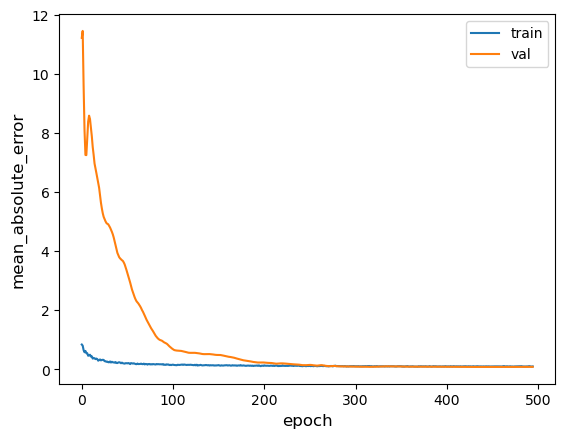

3/3 [==============================] - 0s 1ms/step - loss: 0.0342 - mean_absolute_error: 0.1150
Test accuracy 0.11501803994178772
Test loss 0.03424779698252678


In [328]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [329]:
y_test_pred = multi_dense_model.predict(x_test)

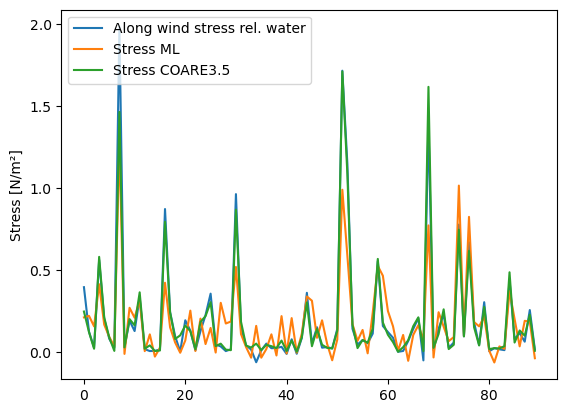

In [330]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [331]:
rmse(y_test.values, y_test_pred)

0.42973859230518163

In [332]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [333]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.88081446],
       [0.88081446, 1.        ]])

In [334]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

# __________________________________________________

# s0, s0_max, s0_min, s0_std, inc, az

In [335]:
predictor_variables = ['s0', 's0_max', 's0_min', 's0_std', 'inc', 'az', 'u10', 'v10']

In [336]:
x = df[predictor_variables]
x

s0     s0_max     s0_min  s0_std        inc          az       u10  \
300 -29.809161 -29.809161 -29.809161     0.0  40.733684  280.224518  6.045154   
381 -16.680374 -16.680374 -16.680374     0.0  40.732366  280.222870  8.021218   
108 -19.353100 -19.353100 -19.353100     0.0  40.723802  280.224518 -5.669697   
94  -15.135897 -15.135897 -15.135897     0.0  42.400538  440.389984  6.495847   
289 -17.218870 -17.218870 -17.218870     0.0  33.757924  282.000641  6.045154   
..         ...        ...        ...     ...        ...         ...       ...   
293 -13.658052 -13.658052 -13.658052     0.0  33.754719  282.000427  6.045154   
235 -17.913435 -17.913435 -17.913435     0.0  40.732870  280.222595  2.151350   
84  -16.634214 -16.634214 -16.634214     0.0  42.397246  440.389404  3.966743   
95  -12.334466 -12.334466 -12.334466     0.0  31.666229  439.104034  7.627155   
215 -20.461043 -20.461043 -20.461043     0.0  40.732127  280.224121 -0.009023   

           v10  
300   7.037160  
381  -1.367607  
108  -2.507397  
94   11.473030  
289   7.037160  
..         ...  
293   7.037160  
235  -7.729190  
84   -7.637461  
95    2.237181  
215   1.070539  

[410 rows x 8 columns]

In [337]:
y = -  df['UWr'] * df['rhoair']
y

300   -0.003707
381    0.124103
108    0.083250
94     0.229089
289    0.130489
         ...   
293    0.079242
235    0.116743
84     0.063755
95     0.256668
215    0.016093
Length: 410, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

In [338]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [339]:
y_train = y[:split_idx]
y_test = y[split_idx:]

# ML setup

In [340]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [341]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [342]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 16ms/step - loss: 1641.8933 - mean_absolute_error: 38.1055 - val_loss: 1709.3633 - val_mean_absolute_error: 38.6316
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 1376.8566 - mean_absolute_error: 34.7417 - val_loss: 1477.2506 - val_mean_absolute_error: 35.6966
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 1272.6804 - mean_absolute_error: 33.0297 - val_loss: 1265.8180 - val_mean_absolute_error: 32.8033
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 1058.7838 - mean_absolute_error: 29.9291 - val_loss: 1077.7277 - val_mean_absolute_error: 30.0048
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 841.7185 - mean_absolute_error: 26.6174 - val_loss: 911.9094 - val_mean_absolute_error: 27.3106
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 700.4730 - mean_absolute_error: 23.9276 - val_loss: 768.0941 - val_mean_absolute_erro

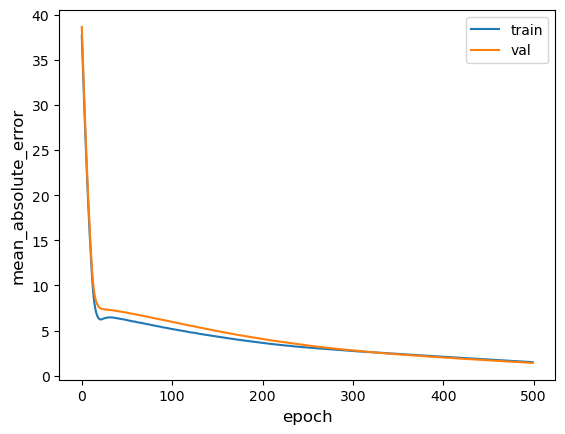

3/3 [==============================] - 0s 1ms/step - loss: 4.0518 - mean_absolute_error: 1.6171
Test accuracy 1.6171060800552368
Test loss 4.051799297332764


In [343]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [344]:
y_test_pred = multi_dense_model.predict(x_test)

In [345]:
np.mean(y_test)

0.20288953337977453

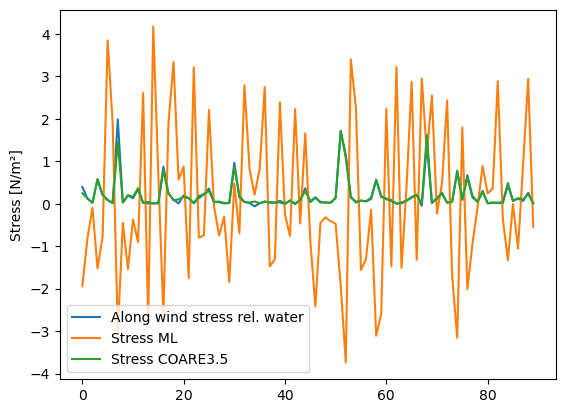

In [346]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [347]:
rmse(y_test.values, y_test_pred)

1.8902075383671544

In [348]:
rmse(y_test.values, c_test)

0.06884559918794826

In [349]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[ 1.        , -0.36254613],
       [-0.36254613,  1.        ]])

In [350]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

# Other experiments

In [351]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [352]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [353]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
14/14 [==============================] - 0s 8ms/step - loss: 7.2432 - mean_absolute_error: 2.3707 - val_loss: 838.9749 - val_mean_absolute_error: 28.0944
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 6.0461 - mean_absolute_error: 2.0160 - val_loss: 279.3611 - val_mean_absolute_error: 16.0536
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 5.2588 - mean_absolute_error: 1.8985 - val_loss: 107.8922 - val_mean_absolute_error: 9.8122
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 3.9015 - mean_absolute_error: 1.5433 - val_loss: 37.0933 - val_mean_absolute_error: 5.5585
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 2.5785 - mean_absolute_error: 1.3055 - val_loss: 8.0577 - val_mean_absolute_error: 2.2110
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 1.5703 - mean_absolute_error: 1.0009 - val_loss: 2.0591 - val_mean_absolute_error: 1.1628
Epoch 7/500
1

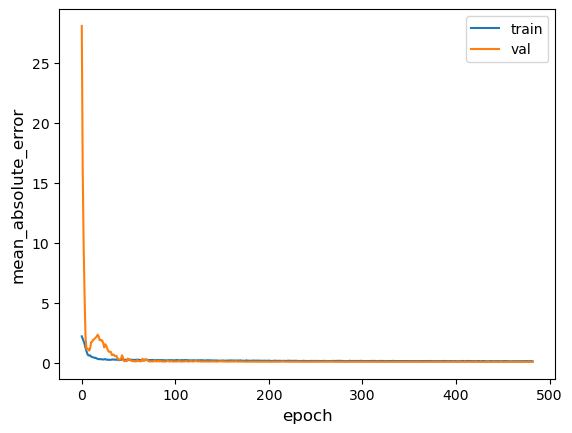

3/3 [==============================] - 0s 1ms/step - loss: 0.0535 - mean_absolute_error: 0.1364
Test accuracy 0.13635164499282837
Test loss 0.05354920029640198


In [354]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [355]:
y_test_pred = multi_dense_model.predict(x_test)

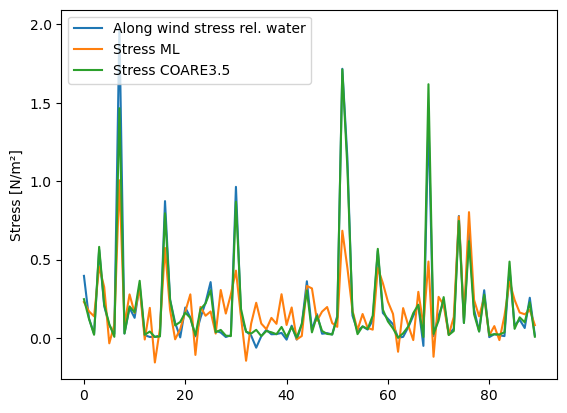

In [356]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [357]:
rmse(y_test.values, y_test_pred)

0.40697759243790715

In [358]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [359]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.80208253],
       [0.80208253, 1.        ]])

In [360]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [361]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [362]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [363]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
14/14 [==============================] - 1s 10ms/step - loss: 1.1247 - mean_absolute_error: 0.7725 - val_loss: 186.9614 - val_mean_absolute_error: 13.4114
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 0.4714 - mean_absolute_error: 0.5331 - val_loss: 61.3897 - val_mean_absolute_error: 7.6165
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 0.7660 - mean_absolute_error: 0.6178 - val_loss: 24.1533 - val_mean_absolute_error: 4.7103
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 0.3397 - mean_absolute_error: 0.3803 - val_loss: 12.3289 - val_mean_absolute_error: 3.2934
Epoch 5/500
14/14 [==============================] - 0s 3ms/step - loss: 0.3142 - mean_absolute_error: 0.3946 - val_loss: 6.5582 - val_mean_absolute_error: 2.3224
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 0.4343 - mean_absolute_error: 0.4467 - val_loss: 4.0261 - val_mean_absolute_error: 1.7177
Epoch 7/500
14/

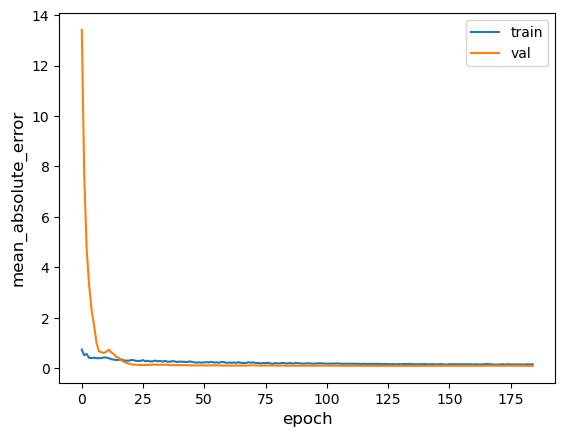

3/3 [==============================] - 0s 1ms/step - loss: 0.0740 - mean_absolute_error: 0.1439
Test accuracy 0.14391537010669708
Test loss 0.07397127151489258


In [364]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [365]:
y_test_pred = multi_dense_model.predict(x_test)

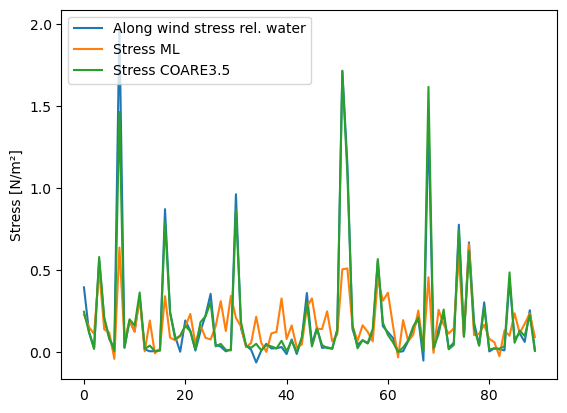

In [366]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [367]:
rmse(y_test.values, y_test_pred)

0.38649148155822693

In [368]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [369]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.71897854],
       [0.71897854, 1.        ]])

In [370]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [371]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [372]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [373]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 1.0831 - mean_absolute_error: 0.8095 - val_loss: 65.9658 - val_mean_absolute_error: 8.0516
Epoch 2/500
1/1 [==============================] - 0s 29ms/step - loss: 1.3836 - mean_absolute_error: 0.8845 - val_loss: 18.9607 - val_mean_absolute_error: 4.3279
Epoch 3/500
1/1 [==============================] - 0s 28ms/step - loss: 0.7909 - mean_absolute_error: 0.6933 - val_loss: 0.8313 - val_mean_absolute_error: 0.8031
Epoch 4/500
1/1 [==============================] - 0s 28ms/step - loss: 0.6415 - mean_absolute_error: 0.6056 - val_loss: 1.5337 - val_mean_absolute_error: 0.9497
Epoch 5/500
1/1 [==============================] - 0s 26ms/step - loss: 0.6192 - mean_absolute_error: 0.5752 - val_loss: 1.7582 - val_mean_absolute_error: 1.1480
Epoch 6/500
1/1 [==============================] - 0s 25ms/step - loss: 0.5409 - mean_absolute_error: 0.5666 - val_loss: 0.8130 - val_mean_absolute_error: 0.7210
Epoch 7/500
1/1 [===========

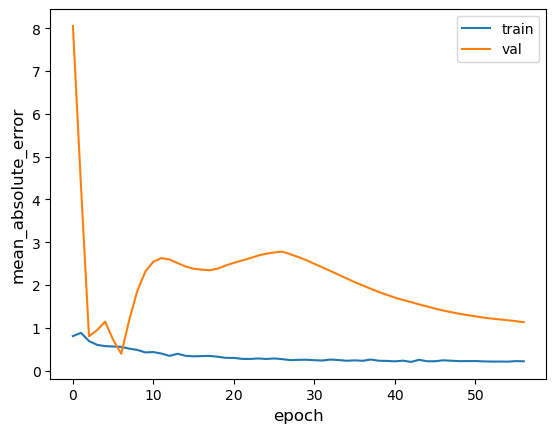

3/3 [==============================] - 0s 1ms/step - loss: 1.3154 - mean_absolute_error: 1.0462
Test accuracy 1.0461519956588745
Test loss 1.3153831958770752


In [374]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [375]:
y_test_pred = multi_dense_model.predict(x_test)

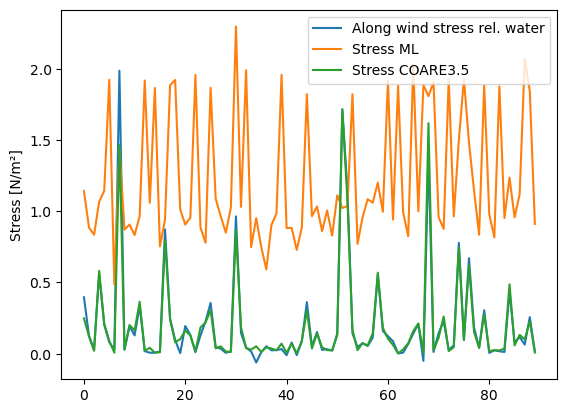

In [376]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [377]:
rmse(y_test.values, y_test_pred)

1.1681904731417234

In [378]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [379]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.15276829],
       [0.15276829, 1.        ]])

In [380]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])